# Lotka–Volterra Like Systems

This work seeks the complete analytic solution of the 2 mode Lotka-Volterra nonlinear coupled ordinary differential equations. It is inspired by recent results by the author that solve nonlinear coupled ordinary differential equations in terms of ratios of Weierstrass Sigma functions. So far a solution to the the Lotka-Volterra systems has not been found in this work but a solution to two related systems with different quadratic terms has.

Nonlinear differential equations (includes nice discussion of Lotka–Volterra 2 mode systems for species populations)

https://www-users.cse.umn.edu/~olver/ln_/odq.pdf

Other solutions to Lotka–Volterra

https://www.itm-conferences.org/articles/itmconf/pdf/2019/06/itmconf_iccmae2018_01016.pdf

Some elliptic solutions to Lotka-Volterra (3 modes) Robert S Maier at Arizona has written a few papers

https://arxiv.org/pdf/1211.5813.pdf

https://arxiv.org/pdf/1203.0283.pdf

https://arxiv.org/pdf

Some good refs here:

https://arxiv.org/pdf/2303.09317.pdf

Lagrangians for LV

https://docs.juliahub.com/GeometricProblems/4fHs6/0.1.8/lotka_volterra_2d/

Logistic differential equation
https://www-users.cse.umn.edu/~olver/ln_/odq.pdf/0807.1081.pdf

In [2]:
from sympy import *
(x, y, X, Y, Z, B, C, n, m, l, j, q, N, M, K, k, epsilon, z, s, p1, p2, p3, g2, g3,
 z0, w1, w2, w3, e1, e2, e3, Delta, rho,
 omega1, omega2, omega3, eta1, eta2, eta3, d1, d2, d3) = symbols(
    '''x, y, X, Y, Z, B, C, n, m, l, j, q, N, M, K, k, epsilon, z, s, p1, p2, p3, g2, g3,
    z0, w1, w2, w3, e1, e2, e3, Delta, rho,
    omega1, omega2, omega3, eta1, eta2, eta3, d1, d2, d3'''
)
alpha, delta, t, nu, epsilon, theta = symbols('alpha, delta, t, nu, epsilon, theta')
pw = Function('pw') # Weierstrass P function
pwp = Function('pwp') # Derivative of Weierstrass P function
zw = Function('zw') # Weierstrass Zeta function
sigma = Function('sigma') # Weierstrass Sigma function
f = Function('f')
h = Function('h')
s = Function('s')
u = Function('u')
v = Function('v')
P = Function('P') # Polynomial
Q = Function('Q') # Polynomial
R = Function('') # Polynomial
phi = Function('phi')
Phi = Function('Phi')
phi1 = Function('phi1')
phi2 = Function('phi2')
phi3 = Function('phi3')
A = Function('A')
Ac = Function('Ac')
A1 = Function('A1')
A2 = Function('A2')
A3 = Function('A3')
Ac1 = Function('Ac1')
Ac2 = Function('Ac2')
Ac3 = Function('Ac3')
A4 = Function('A4')
A5 = Function('A5')
A6 = Function('A6')
A7 = Function('A7')
A8 = Function('A8')
W1 = Function('W1')
W2 = Function('W2')
W3 = Function('W3')
W4 = Function('W4')
W5 = Function('W5')
W6 = Function('W6')
Det = Function("Det")

kappa = IndexedBase('kappa')
beta = IndexedBase('beta')
mu = IndexedBase('mu')
xi = IndexedBase('xi')
a = IndexedBase('a')
b = IndexedBase('b')
c = IndexedBase('c')
d = IndexedBase('d')
p = IndexedBase('p')
G = IndexedBase('G')
psi = IndexedBase('psi')
upsilon = IndexedBase('upsilon')
WPdet = Function('WPdet')

Omega = IndexedBase('Omega')
T = Function('T')
V = Function('V')
Dz = Function('Dz') # Derivate w.r.t z
L = Function('L')
U = Function("U")
W = Function("W")
from math import prod

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
from numpy import linspace, absolute, angle, square, real, imag, conj, array as arraynp, vectorize, concatenate
import scipy.integrate
import matplotlib.pyplot as plt

# The package containing mpmath expressions for Weierstrass elliptic functions
from numerical_evaluation.weierstrass_modified import Weierstrass
we = Weierstrass()
from mpmath import exp as mpexp

## Background elliptic function theory

In [4]:
pwp_def = Eq(pwp(z,g2,g3)**2, 4*pw(z,g2,g3)**3 - g2*pw(z,g2,g3) - g3)
pwp_def

Eq(pwp(z, g2, g3)**2, -g2*pw(z, g2, g3) - g3 + 4*pw(z, g2, g3)**3)

In [5]:
pwp2_def = Eq(diff(pwp_def.lhs,z)/pwp(z,g2,g3)/2, diff(pwp_def.rhs,z).subs(diff(pw(z,g2,g3),z),pwp(z,g2,g3))/pwp(z,g2,g3)/2).expand()
pwp2_def

Eq(Derivative(pwp(z, g2, g3), z), -g2/2 + 6*pw(z, g2, g3)**2)

In [6]:
pw_to_zw_identity = Eq(
    (pwp(x,g2,g3) - pwp(y,g2,g3))/(pw(x,g2,g3) - pw(y,g2,g3))/2,
    zw(x + y,g2, g3) - zw(x,g2, g3) - zw(y,g2, g3)
)
pw_to_zw_identity

Eq((pwp(x, g2, g3) - pwp(y, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3))), -zw(x, g2, g3) - zw(y, g2, g3) + zw(x + y, g2, g3))

In [7]:
diff_zeta_eq = Eq(diff(zw(z,g2,g3),z), -pw(z,g2,g3))
diff_zeta_eq

Eq(Derivative(zw(z, g2, g3), z), -pw(z, g2, g3))

In [8]:
integral_zeta_log_sigma = Eq(Integral(zw(z,g2,g3),z),log(sigma(z,g2,g3)))
integral_zeta_log_sigma

Eq(Integral(zw(z, g2, g3), z), log(sigma(z, g2, g3)))

In [9]:
sigma_p_identity = Eq(
    pw(y, g2, g3) - pw(x, g2, g3),
    sigma(x + y, g2, g3) * sigma(x - y, g2, g3) / (sigma(x, g2, g3) ** 2 * sigma(y, g2, g3) ** 2) 
)
sigma_p_identity

Eq(-pw(x, g2, g3) + pw(y, g2, g3), sigma(x - y, g2, g3)*sigma(x + y, g2, g3)/(sigma(x, g2, g3)**2*sigma(y, g2, g3)**2))

In [10]:
zw_quasi_eq = Eq(zw(z + 2*omega1*n+ 2*omega3*m,g2,g3), zw(z,g2,g3) + 2*n*eta1 + 2*m*eta3)
zw_quasi_eq

Eq(zw(2*m*omega3 + 2*n*omega1 + z, g2, g3), 2*eta1*n + 2*eta3*m + zw(z, g2, g3))

In [11]:
pwp_sigma_id = Eq(pwp(z,g2,g3),-sigma(2*z,g2,g3)/sigma(z,g2,g3)**4)
pwp_sigma_id

Eq(pwp(z, g2, g3), -sigma(2*z, g2, g3)/sigma(z, g2, g3)**4)

In [12]:
zw_sigma_id = pw_to_zw_identity.subs([sigma_p_identity.args, pwp_sigma_id.subs(z,x).args, pwp_sigma_id.subs(z,y).args]).simplify()
zw_sigma_id

Eq(zw(x, g2, g3) + zw(y, g2, g3) - zw(x + y, g2, g3), -(-sigma(x, g2, g3)**4*sigma(2*y, g2, g3) + sigma(2*x, g2, g3)*sigma(y, g2, g3)**4)/(2*sigma(x, g2, g3)**2*sigma(y, g2, g3)**2*sigma(x - y, g2, g3)*sigma(x + y, g2, g3)))

In [13]:
# 23.10.9 https://dlmf.nist.gov/23.10#E9
zw2z_2zwz = Eq(zw(2*z,g2,g3), 2*zw(z,g2,g3) + diff(zw(z,g2,g3),z,3)/diff(zw(z,g2,g3),z,2)/2)
zw2z_2zwz

Eq(zw(2*z, g2, g3), 2*zw(z, g2, g3) + Derivative(zw(z, g2, g3), (z, 3))/(2*Derivative(zw(z, g2, g3), (z, 2))))

In [14]:
dzw_1 = Eq(diff(zw(z,g2,g3),z), -pw(z,g2,g3))
dzw_2 = Eq(diff(zw(z,g2,g3),z,2), -pwp(z,g2,g3))
dzw_3 = Eq(diff(zw(z,g2,g3),z,3), -diff(pwp(z,g2,g3),z))
zw2z_2zwz_pw_pwp = zw2z_2zwz.subs([dzw_3.args, dzw_2.args]).subs(*pwp2_def.args)
dzw_1
dzw_2
dzw_3
zw2z_2zwz_pw_pwp

Eq(Derivative(zw(z, g2, g3), z), -pw(z, g2, g3))

Eq(Derivative(zw(z, g2, g3), (z, 2)), -pwp(z, g2, g3))

Eq(Derivative(zw(z, g2, g3), (z, 3)), -Derivative(pwp(z, g2, g3), z))

Eq(zw(2*z, g2, g3), (-g2/2 + 6*pw(z, g2, g3)**2)/(2*pwp(z, g2, g3)) + 2*zw(z, g2, g3))

In [15]:
sigma_zeta_eq = Eq(diff(integral_zeta_log_sigma.lhs,z)*sigma(z,g2,g3)/zw(z,g2,g3), 
             diff(integral_zeta_log_sigma.rhs,z)*sigma(z,g2,g3)/zw(z,g2,g3))
sigma_zeta_eq

Eq(sigma(z, g2, g3), Derivative(sigma(z, g2, g3), z)/zw(z, g2, g3))

In [16]:
sigma_period_eq_1n = Eq(sigma(z + 2 * n * omega1, g2, g3), 
                       (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta1 * (n * omega1 + z)))
sigma_period_eq_1n

Eq(sigma(2*n*omega1 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta1*n*(n*omega1 + z)))

In [17]:
sigma_period_eq_1n = Eq(sigma(z + 2 * n * omega1, g2, g3), 
                       (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta1 * (n * omega1 + z)))
sigma_period_eq_2n = Eq(sigma(z + 2 * n * omega2, g2, g3), 
                        (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta2 * (n * omega2 + z)))
sigma_period_eq_3n = Eq(sigma(z + 2 * n * omega3, g2, g3), 
                        (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta3 * (n * omega3 + z)))
sigma_period_eq_n1_m3_a = (
    sigma_period_eq_1n
    .subs(z,z+2*m*omega3)
    .subs(sigma_period_eq_3n.lhs.subs(n,m), sigma_period_eq_3n.rhs.subs(n,m))
    .simplify()
)
sigma_period_eq_n1_m3_b = (
    sigma_period_eq_3n
    .subs(n,m)
    .subs(z,z+2*n*omega1)
    .subs(sigma_period_eq_1n.lhs, sigma_period_eq_1n.rhs)
    .simplify()
)
eta1_eta3_omega_id = Eq(sigma_period_eq_n1_m3_a.lhs/sigma_period_eq_n1_m3_b.lhs,
   sigma_period_eq_n1_m3_a.rhs/sigma_period_eq_n1_m3_b.rhs
  ).simplify()
eta_omega_ww = Eq(eta1*omega3-eta3*omega1,I*pi/2)
symmetry_nm_eta_omega = Eq(exp(2*m*n*(eta1*omega3-eta3*omega1))*(
    exp(2*m*n*(eta1*omega3-eta3*omega1)).subs(eta_omega_ww.lhs, eta_omega_ww.rhs).subs(exp(I*pi*n*m), (-1)**(n*m))),
   (exp(2*m*n*(eta1*omega3-eta3*omega1))*exp(2*m*n*(eta1*omega3-eta3*omega1))
   ).simplify().subs(eta1_eta3_omega_id.lhs, eta1_eta3_omega_id.rhs)
  )
sigma_period_eq_sym_nm = Eq(sigma_period_eq_n1_m3_b.lhs, 
                            sigma_period_eq_n1_m3_b.rhs*symmetry_nm_eta_omega.lhs).expand().simplify()


sigma_period_eq_1n
sigma_period_eq_2n
sigma_period_eq_3n
sigma_period_eq_n1_m3_a.expand()
sigma_period_eq_n1_m3_b.expand()
eta1_eta3_omega_id
eta_omega_ww
symmetry_nm_eta_omega
sigma_period_eq_sym_nm

Eq(sigma(2*n*omega1 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta1*n*(n*omega1 + z)))

Eq(sigma(2*n*omega2 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta2*n*(n*omega2 + z)))

Eq(sigma(2*n*omega3 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta3*n*(n*omega3 + z)))

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**m*(-1)**n*sigma(z, g2, g3)*exp(2*eta1*n*z)*exp(2*eta1*n**2*omega1)*exp(2*eta3*m*z)*exp(2*eta3*m**2*omega3)*exp(4*eta1*m*n*omega3))

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**m*(-1)**n*sigma(z, g2, g3)*exp(2*eta1*n*z)*exp(2*eta1*n**2*omega1)*exp(2*eta3*m*z)*exp(2*eta3*m**2*omega3)*exp(4*eta3*m*n*omega1))

Eq(exp(4*m*n*(eta1*omega3 - eta3*omega1)), 1)

Eq(eta1*omega3 - eta3*omega1, I*pi/2)

Eq((-1)**(m*n)*exp(2*m*n*(eta1*omega3 - eta3*omega1)), 1)

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**(m*n + m + n)*sigma(z, g2, g3)*exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*z + 2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*z))

In [18]:
# Whittaker and Watson 5th edition excercise 20.24 p482
sigma_3z = Eq(sigma(3*z,g2,g3)/sigma(z,g2,g3)**9, 3*pw(z,g2,g3)*pwp(z,g2,g3)**2 - diff(pwp(z,g2,g3),z)**2/4)
sigma_3zb = sigma_3z.subs(*pwp2_def.args)
sigma_3z
sigma_3zb

Eq(sigma(3*z, g2, g3)/sigma(z, g2, g3)**9, 3*pw(z, g2, g3)*pwp(z, g2, g3)**2 - Derivative(pwp(z, g2, g3), z)**2/4)

Eq(sigma(3*z, g2, g3)/sigma(z, g2, g3)**9, -(-g2/2 + 6*pw(z, g2, g3)**2)**2/4 + 3*pw(z, g2, g3)*pwp(z, g2, g3)**2)

## Euler Lagrange Equations

In [19]:
euler_lagrange_eqs = [Eq(Derivative(L(u(z),v(z),diff(u(z),z),diff(v(z),z)),f) - 
Derivative(Derivative(L(u(z),v(z),diff(u(z),z),diff(v(z),z)),Derivative(f,z)),z),0) for f in [u(z), v(z)]]
for el in euler_lagrange_eqs:
    el 

Eq(Derivative(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), u(z)) - Derivative(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), Derivative(u(z), z), z), 0)

Eq(Derivative(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), v(z)) - Derivative(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), Derivative(v(z), z), z), 0)

## The Lotka-Volterra System

This work aims to find solutions to this system which is known as the Lotka-Volterra system and describes predator-prey species competition dynamics. It was the inspiration for this research but investigations have not yet yielded a solution.

In [225]:
# lk_kinetic  = ((u(z)+a*ln(u(z)))*diff(v(z),z) - (v(z)+b*ln(v(z)))*diff(u(z),z))/2 
# lk_kinetic  = ln(v(z))/u(z)*diff(u(z),z)/2 - ln(u(z))/v(z)*diff(v(z),z)/2
lk_kinetic  = ln(v(z))*Derivative(ln(u(z)),z)/2 - ln(u(z))*Derivative(ln(v(z)),z)/2
# lk_kinetic = (u(z)*diff(v(z),z) - v(z)*diff(u(z),z))/2
lk_potential = (alpha*ln(v(z)) + beta*ln(u(z)) - delta*v(z) + kappa*u(z) 
                # + epsilon*(log(u(z))*log(v(z))**2 + log(u(z))**2*log(v(z))) +
                # + mu*(log(u(z))*v(z) + u(z)*log(v(z))) + mu*(u(z)*v(z)**2+v(z)*u(z)**2) 
                # + mu*f(u(z),v(z))
               )

lk_potential_exp_approx = (alpha*ln(v(z)) + beta*ln(u(z)) 
                           - delta*(1 + ln(v(z)) + ln(v(z))**2/factorial(2) + ln(v(z))**3/factorial(3)) 
                           + kappa*(1 + ln(u(z)) + ln(u(z))**2/factorial(2) + ln(u(z))**3/factorial(3)) 
               )

lk_lagrangian = Eq(L(u(z),v(z),diff(u(z),z),diff(v(z),z)), lk_kinetic - lk_potential)
lk_lagrangian

Eq(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), -alpha*log(v(z)) + delta*v(z) - u(z)*kappa - log(u(z))*Derivative(log(v(z)), z)/2 - log(u(z))*beta + log(v(z))*Derivative(log(u(z)), z)/2)

In [224]:
dv1_lk = Eq(diff(u(z),z),solve(euler_lagrange_eqs[1].subs(*lk_lagrangian.args).doit() , diff(u(z),z))[0]).simplify().expand()
dv2_lk = Eq(diff(v(z),z),solve(euler_lagrange_eqs[0].subs(*lk_lagrangian.args).doit() , diff(v(z),z))[0]).simplify().expand()
dv1_lk
dv2_lk

Eq(Derivative(u(z), z), alpha*u(z) - delta*u(z)*log(v(z))**2/2 - delta*u(z)*log(v(z)) - delta*u(z))

Eq(Derivative(v(z), z), -v(z)*log(u(z))**2*kappa/2 - v(z)*log(u(z))*kappa - v(z)*beta - v(z)*kappa)

In [22]:
k_conserved = Eq(k, lk_potential)
k_conserved

Eq(k, alpha*log(v(z)) - delta*v(z) + u(z)*kappa + log(u(z))*beta)

In [23]:
diff(k_conserved.rhs,z).subs([dv1_lk.args, dv2_lk.args]).expand().collect(u(z))

0

In [24]:
v_as_ln_diff_u_lk = Eq(v(z), solve(dv1_lk.lhs - dv1_lk.rhs,v(z))[0])
v_as_ln_diff_u_lk

Eq(v(z), alpha/delta - Derivative(u(z), z)/(delta*u(z)))

In [25]:
diff_u_only_eq_lk = Eq((dv2_lk.lhs - dv2_lk.rhs).subs(*v_as_ln_diff_u_lk.args),0)
diff_u_only_eq_lk

Eq((alpha/delta - Derivative(u(z), z)/(delta*u(z)))*u(z)*kappa + (alpha/delta - Derivative(u(z), z)/(delta*u(z)))*beta + Derivative(alpha/delta - Derivative(u(z), z)/(delta*u(z)), z), 0)

In [26]:
diff_u_only_eq_lk_expanded = (diff_u_only_eq_lk.doit().expand().lhs*u(z)**2*delta).expand()
diff_u_only_eq_lk_expanded

alpha*u(z)**3*kappa + alpha*u(z)**2*beta - u(z)**2*Derivative(u(z), z)*kappa - u(z)*Derivative(u(z), z)*beta - u(z)*Derivative(u(z), (z, 2)) + Derivative(u(z), z)**2

## System 1: A solvable Lotka–Volterra like system
Thus far, solving the Lotka-Volterra system has proved difficult. In order to get some angle of attack, a Lagrangian is constructed that has at least some similarity with the LK system, but conserves a known quantity that does not involve logarithms and can be solved using elliptic functions. This Lagrangian is as follows:

In [27]:
kinetic  = (u(z)*diff(v(z),z) - v(z)*diff(u(z),z))/2
potential = alpha*u(z)*v(z) +delta*u(z)*v(z)**2 + beta*u(z)**2*v(z)
lagrangian = Eq(L(u(z),v(z),diff(u(z),z),diff(v(z),z)), kinetic - potential)
lagrangian

Eq(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), -alpha*u(z)*v(z) - delta*u(z)*v(z)**2 - u(z)**2*v(z)*beta + u(z)*Derivative(v(z), z)/2 - v(z)*Derivative(u(z), z)/2)

So it can be seen that the difference with the LK system and this one, is the $u(z)^2, v(z)^2$ terms in this example:

In [28]:
dv1 = Eq(diff(v(z),z),solve(euler_lagrange_eqs[0].subs(*lagrangian.args).doit() , diff(v(z),z))[0]).expand()
dv2 = Eq(diff(u(z),z),solve(euler_lagrange_eqs[1].subs(*lagrangian.args).doit() , diff(u(z),z))[0]).expand()
dv1
dv2

Eq(Derivative(v(z), z), alpha*v(z) + delta*v(z)**2 + 2*u(z)*v(z)*beta)

Eq(Derivative(u(z), z), -alpha*u(z) - 2*delta*u(z)*v(z) - u(z)**2*beta)

The system can easily be rescaled to reduce the number of paramters:

In [29]:
dv1_scaled = dv1.subs([(u(z),u(z)/beta),(v(z),v(z)/delta)])
dv2_scaled = dv2.subs([(u(z),u(z)/beta),(v(z),v(z)/delta)])
dv1_scaled = Eq(dv1_scaled.lhs*delta, dv1_scaled.rhs*delta).simplify()
dv2_scaled = Eq(dv2_scaled.lhs*beta, dv2_scaled.rhs*beta).simplify()
dv1_scaled
dv2_scaled

Eq(Derivative(v(z), z), (alpha + 2*u(z) + v(z))*v(z))

Eq(Derivative(u(z), z), (-alpha - u(z) - 2*v(z))*u(z))

It conserves the following quantity:

In [30]:
potential_scaled = Eq(p,potential.subs([(delta,1),(beta,1)]))
potential_scaled

Eq(p, alpha*u(z)*v(z) + u(z)**2*v(z) + u(z)*v(z)**2)

In [31]:
diff(potential_scaled.rhs.expand(),z).subs([dv1_scaled.args, dv2_scaled.args]).expand()

0

### Weierstrass sigma function solutions

It is easily shown that the product $u(z)v(z)$ (plus a constant) solves the differential Weierstrass P function:

In [32]:
p_sqrd_terms = Eq((p - alpha*u(z)*v(z))**2,(potential_scaled.rhs.expand() - alpha*u(z)*v(z))**2)
p_sqrd_terms

Eq((-alpha*u(z)*v(z) + p)**2, (u(z)**2*v(z) + u(z)*v(z)**2)**2)

In [33]:
duv_sqrd = Eq(Derivative(u(z)*v(z),z)**2, ((diff(u(z)*v(z),z).subs(
    [dv1_scaled.args, dv2_scaled.args]).expand())**2 - (p_sqrd_terms.rhs - p_sqrd_terms.lhs)).expand())
duv_sqrd

Eq(Derivative(u(z)*v(z), z)**2, alpha**2*u(z)**2*v(z)**2 - 2*alpha*u(z)*v(z)*p - 4*u(z)**3*v(z)**3 + p**2)

In [34]:
ufv_sub = Eq(u(z),(-f(z)+solve(duv_sqrd.subs(u(z),(-f(z)+c)/v(z)).rhs.expand().collect(f(z)).coeff(f(z)**2),c)[0])/v(z))
ufv_sub

Eq(u(z), (alpha**2/12 - f(z))/v(z))

In [35]:
df_sqrd = duv_sqrd.subs(*ufv_sub.args).doit().expand()
df_sqrd = Eq(df_sqrd.lhs, (df_sqrd.rhs).collect(f(z)))
df_sqrd

Eq(Derivative(f(z), z)**2, alpha**6/216 - alpha**3*p/6 + (-alpha**4/12 + 2*alpha*p)*f(z) + 4*f(z)**3 + p**2)

In [36]:
g2_eq = Eq(g2, -df_sqrd.rhs.coeff(f(z)))
g2_eq

Eq(g2, alpha**4/12 - 2*alpha*p)

In [37]:
Eq(X,solve(p - (X+1)/24*alpha**3,X)[0])

Eq(X, -1 + 24*p/alpha**3)

In [38]:
g2_eq.subs(p,(X+1)/24*alpha**3).expand()

Eq(g2, -X*alpha**4/12)

In [39]:
g3_eq = Eq(g3, -df_sqrd.rhs.subs(f(z),0))
g3_eq

Eq(g3, -alpha**6/216 + alpha**3*p/6 - p**2)

In [40]:
(g2_eq.rhs**3 - 27*g3_eq.rhs**2).expand().factor()

-(-alpha**3 + 27*p)*p**3

In [41]:
g3_eq.subs(p,solve(g2_eq,p)[0]).expand()

Eq(g3, alpha**6/1728 - alpha**2*g2/24 - g2**2/(4*alpha**2))

In [42]:
g3_eq.subs(p,solve(g2_eq,p)[0]).expand().subs(g2,-X*alpha**4/12)

Eq(g3, -X**2*alpha**6/576 + X*alpha**6/288 + alpha**6/1728)

In [43]:
jinv = Eq(j,1728*g2**3/(g2**3 - 27*g3**2))
jinv

Eq(j, 1728*g2**3/(g2**3 - 27*g3**2))

In [44]:
jinv_as_X = jinv.subs([g2_eq.args, g3_eq.args]).subs(p,(X+1)/24*alpha**3).expand().simplify()
jinv_as_X

Eq(j, 110592*X**3/(9*X**4 + 28*X**3 + 30*X**2 + 12*X + 1))

In [45]:
Eq(j, jinv_as_X.subs(X,Y-1).expand().simplify().rhs.factor().subs(Y,X+1))

Eq(j, 110592*X**3/((X + 1)**3*(9*X + 1)))

In [46]:
df_sqrd_wp = df_sqrd.subs([(g2_eq.rhs,g2_eq.lhs), (g3_eq.rhs,g3_eq.lhs)])
df_sqrd_wp

Eq(Derivative(f(z), z)**2, -g2*f(z) - g3 + 4*f(z)**3)

In [47]:
fpw = Eq(f(z),pw(z-z0,g2,g3))
fpw

Eq(f(z), pw(z - z0, g2, g3))

In [48]:
uv_as_f = Eq(u(z)*v(z),(-f(z)+alpha**2/12))
uv_as_f

Eq(u(z)*v(z), alpha**2/12 - f(z))

In [49]:
u0_v0_pw_z0 = uv_as_f.subs(*fpw.args).subs(z,0).subs(pw(-z0,g2,g3),pw(z0,g2,g3))
pw_z0_u0_v0 = Eq(pw(z0,g2,g3), solve(u0_v0_pw_z0.lhs - u0_v0_pw_z0.rhs, pw(z0,g2,g3))[0])
pw_z0_u0_v0

Eq(pw(z0, g2, g3), alpha**2/12 - u(0)*v(0))

In [50]:
pwp_z0_u0_v0 = Eq(
    -pwp(z-z0,g2,g3),
    diff(uv_as_f.subs(*fpw.args).lhs,z)
).subs([dv1_scaled.args, dv2_scaled.args]).expand().subs(z,0).subs(pwp(-z0,g2,g3),-pwp(z0,g2,g3))
pwp_z0_u0_v0

Eq(pwp(z0, g2, g3), u(0)**2*v(0) - u(0)*v(0)**2)

In [51]:
dln_u_as_du_dv = Eq(diff(ln(u(z)),z), Derivative(ln(u(z)*v(z)),z)/2 + diff(ln(u(z)/v(z)),z).expand()/2)
dln_u_as_du_dv

Eq(Derivative(u(z), z)/u(z), Derivative(log(u(z)*v(z)), z)/2 - Derivative(v(z), z)/(2*v(z)) + Derivative(u(z), z)/(2*u(z)))

In [52]:
dln_u_over_v = Eq(diff(ln(u(z)/v(z)),z).expand()/2, diff(ln(u(z)/v(z)),z).expand().subs([dv1_scaled.args, dv2_scaled.args])/2)
dln_u_over_v

Eq(-Derivative(v(z), z)/(2*v(z)) + Derivative(u(z), z)/(2*u(z)), -alpha - 3*u(z)/2 - 3*v(z)/2)

In [53]:
p_over_uv = Eq(3*p/u(z)/v(z)/2, 3*(potential_scaled.rhs/u(z)/v(z)).expand()/2)
p_over_uv

Eq(3*p/(2*u(z)*v(z)), 3*alpha/2 + 3*u(z)/2 + 3*v(z)/2)

In [54]:
dln_u_over_v_with_p = Eq(dln_u_over_v.lhs, dln_u_over_v.rhs - p_over_uv.lhs + p_over_uv.rhs)
dln_u_over_v_with_p

Eq(-Derivative(v(z), z)/(2*v(z)) + Derivative(u(z), z)/(2*u(z)), alpha/2 - 3*p/(2*u(z)*v(z)))

In [55]:
dln_u_f = dln_u_as_du_dv.subs(*dln_u_over_v_with_p.args).subs(*uv_as_f.args).doit()
dln_u_f

Eq(Derivative(u(z), z)/u(z), alpha/2 - 3*p/(alpha**2/6 - 2*f(z)) - Derivative(f(z), z)/(2*(alpha**2/12 - f(z))))

In [56]:
pw_alpha = Eq(pw(xi[0],g2,g3),alpha**2/12)
pw_alpha

Eq(pw(xi[0], g2, g3), alpha**2/12)

In [57]:
Eq(pwp(xi[0],g2,g3)**2, df_sqrd.rhs.subs(f(z),alpha**2/12)).expand()

Eq(pwp(xi[0], g2, g3)**2, p**2)

In [58]:
pwp_xi0 = Eq(pwp(xi[0],g2,g3), p)
pwp_xi0

Eq(pwp(xi[0], g2, g3), p)

In [59]:
dln_u_pw_pwp = dln_u_f.subs([
    fpw.args, (pw_alpha.rhs*12, pw_alpha.lhs*12),(pwp_xi0.rhs, pwp_xi0.lhs)]).subs(Derivative(pw(z-z0,g2,g3),z),pwp(z-z0,g2,g3))
dln_u_pw_pwp

Eq(Derivative(u(z), z)/u(z), alpha/2 - pwp(z - z0, g2, g3)/(2*(-pw(z - z0, g2, g3) + pw(xi[0], g2, g3))) - 3*pwp(xi[0], g2, g3)/(-2*pw(z - z0, g2, g3) + 2*pw(xi[0], g2, g3)))

In [60]:
pw_pwp_zw_Z_xi0 = Eq(
    (2*pw_to_zw_identity.subs([(x,z-z0),(y,-xi[0])]).lhs - 
     pw_to_zw_identity.subs([(x,z-z0),(y,xi[0])]).lhs).expand().subs([
        (pwp(-xi[0],g2,g3),-pwp(xi[0],g2,g3)), (pw(-xi[0],g2,g3),pw(xi[0],g2,g3))
    ]).simplify().expand(),
    (2*pw_to_zw_identity.subs([(x,z-z0),(y,-xi[0])]).rhs - 
     pw_to_zw_identity.subs([(x,z-z0),(y,xi[0])]).rhs).expand().subs([
        (zw(-xi[0],g2,g3),-zw(xi[0],g2,g3))
    ]).simplify().expand()
)
pw_pwp_zw_Z_xi0

Eq(pwp(z - z0, g2, g3)/(2*pw(z - z0, g2, g3) - 2*pw(xi[0], g2, g3)) + 3*pwp(xi[0], g2, g3)/(2*pw(z - z0, g2, g3) - 2*pw(xi[0], g2, g3)), -zw(z - z0, g2, g3) + 2*zw(z - z0 - xi[0], g2, g3) - zw(z - z0 + xi[0], g2, g3) + 3*zw(xi[0], g2, g3))

In [61]:
dlnu_zw_xi0 = Eq(dln_u_pw_pwp.lhs, dln_u_pw_pwp.rhs - pw_pwp_zw_Z_xi0.lhs + pw_pwp_zw_Z_xi0.rhs).simplify()
dlnu_zw_xi0

Eq(Derivative(u(z), z)/u(z), alpha/2 - zw(z - z0, g2, g3) + 2*zw(z - z0 - xi[0], g2, g3) - zw(z - z0 + xi[0], g2, g3) + 3*zw(xi[0], g2, g3))

In [62]:
lnu_sigma = Eq(ln(u(z)), 
   (alpha/2+3*zw(xi[0],g2,g3))*z - ln(sigma(z-z0,g2,g3)) + 2*ln(sigma(z-z0-xi[0],g2,g3)) - ln(sigma(z-z0+xi[0],g2,g3)) +c)
lnu_sigma

Eq(log(u(z)), z*(alpha/2 + 3*zw(xi[0], g2, g3)) - log(sigma(z - z0, g2, g3)) + 2*log(sigma(z - z0 - xi[0], g2, g3)) - log(sigma(z - z0 + xi[0], g2, g3)) + c)

In [63]:
u_as_sigma = Eq(u(z), exp((alpha/2+3*zw(xi[0],g2,g3))*z + c)*sigma(z-z0-xi[0],g2,g3)**2/sigma(z-z0,g2,g3)/sigma(z-z0+xi[0],g2,g3))
u_as_sigma

Eq(u(z), sigma(z - z0 - xi[0], g2, g3)**2*exp(z*(alpha/2 + 3*zw(xi[0], g2, g3)) + c)/(sigma(z - z0, g2, g3)*sigma(z - z0 + xi[0], g2, g3)))

In [64]:
uv_as_pw = uv_as_f.subs([(pw_alpha.rhs, pw_alpha.lhs), fpw.args])
uv_as_pw

Eq(u(z)*v(z), -pw(z - z0, g2, g3) + pw(xi[0], g2, g3))

In [65]:
sigma_p_identity = Eq(
    pw(y, g2, g3) - pw(x, g2, g3),
    sigma(x + y, g2, g3) * sigma(x - y, g2, g3) / (sigma(x, g2, g3) ** 2 * sigma(y, g2, g3) ** 2) 
)
sigma_p_identity

Eq(-pw(x, g2, g3) + pw(y, g2, g3), sigma(x - y, g2, g3)*sigma(x + y, g2, g3)/(sigma(x, g2, g3)**2*sigma(y, g2, g3)**2))

In [66]:
uv_as_sigma = uv_as_pw.subs(*sigma_p_identity.subs([(y,xi[0]),(x,z-z0)]).args)
uv_as_sigma

Eq(u(z)*v(z), sigma(z - z0 - xi[0], g2, g3)*sigma(z - z0 + xi[0], g2, g3)/(sigma(z - z0, g2, g3)**2*sigma(xi[0], g2, g3)**2))

In [67]:
v_as_sigma = Eq(v(z),solve(uv_as_sigma.subs(*u_as_sigma.args),v(z))[0])
v_as_sigma

Eq(v(z), sigma(z - z0 + xi[0], g2, g3)**2*exp(-alpha*z/2 - 3*z*zw(xi[0], g2, g3) - c)/(sigma(z - z0, g2, g3)*sigma(z - z0 - xi[0], g2, g3)*sigma(xi[0], g2, g3)**2))

In [68]:
u_as_sigma_u0 = u_as_sigma.expand().subs(exp(c), solve(u_as_sigma.subs(z,0),exp(c))[0]).simplify()
v_as_sigma_v0 = v_as_sigma.expand().subs(exp(c), solve(v_as_sigma.subs(z,0),exp(c))[0]).simplify()
u_as_sigma_u0
v_as_sigma_v0

Eq(u(z), sigma(-z0, g2, g3)*sigma(-z0 + xi[0], g2, g3)*sigma(z - z0 - xi[0], g2, g3)**2*u(0)*exp(z*(alpha + 6*zw(xi[0], g2, g3))/2)/(sigma(z - z0, g2, g3)*sigma(-z0 - xi[0], g2, g3)**2*sigma(z - z0 + xi[0], g2, g3)))

Eq(v(z), sigma(-z0, g2, g3)*sigma(-z0 - xi[0], g2, g3)*sigma(z - z0 + xi[0], g2, g3)**2*v(0)*exp(-z*(alpha + 6*zw(xi[0], g2, g3))/2)/(sigma(z - z0, g2, g3)*sigma(-z0 + xi[0], g2, g3)**2*sigma(z - z0 - xi[0], g2, g3)))

### Weierstrass zeta function solutions
The solutions can also be expressed in terms of Weierstrass zeta functions.

In [69]:
dlnv_zw_xi0 = Eq(diff(ln(v_as_sigma.lhs),z),diff(ln(v_as_sigma.rhs),z)).expand()
dlnv_zw_xi0 = dlnv_zw_xi0.subs([sigma_zeta_eq.subs(z,z-z0-xi[0]).args, sigma_zeta_eq.subs(z,z-z0+xi[0]).args, sigma_zeta_eq.subs(z,z-z0).args])
dlnv_zw_xi0

Eq(Derivative(v(z), z)/v(z), -alpha/2 - zw(z - z0, g2, g3) - zw(z - z0 - xi[0], g2, g3) + 2*zw(z - z0 + xi[0], g2, g3) - 3*zw(xi[0], g2, g3))

In [70]:
alpha_2v_plus_u = dlnu_zw_xi0.subs([dv1_scaled.args, dv2_scaled.args])
alpha_2u_plus_v = dlnv_zw_xi0.subs([dv1_scaled.args, dv2_scaled.args])
u_v_zw_sols = solve([alpha_2v_plus_u, alpha_2u_plus_v], [u(z), v(z)])
u_zw_sol = Eq(u(z), u_v_zw_sols[u(z)])
v_zw_sol = Eq(v(z), u_v_zw_sols[v(z)])
alpha_2u_plus_v
alpha_2v_plus_u
u_zw_sol
v_zw_sol

Eq(alpha + 2*u(z) + v(z), -alpha/2 - zw(z - z0, g2, g3) - zw(z - z0 - xi[0], g2, g3) + 2*zw(z - z0 + xi[0], g2, g3) - 3*zw(xi[0], g2, g3))

Eq(-alpha - u(z) - 2*v(z), alpha/2 - zw(z - z0, g2, g3) + 2*zw(z - z0 - xi[0], g2, g3) - zw(z - z0 + xi[0], g2, g3) + 3*zw(xi[0], g2, g3))

Eq(u(z), -alpha/2 - zw(z - z0, g2, g3) + zw(z - z0 + xi[0], g2, g3) - zw(xi[0], g2, g3))

Eq(v(z), -alpha/2 + zw(z - z0, g2, g3) - zw(z - z0 - xi[0], g2, g3) - zw(xi[0], g2, g3))

In [71]:
dv1_scaled.subs([u_zw_sol.args, v_zw_sol.args]).subs(z0,0).doit().expand()
dv2_scaled.subs([u_zw_sol.args, v_zw_sol.args]).subs(z0,0).doit().expand()

Eq(Derivative(zw(z, g2, g3), z) - Subs(Derivative(zw(_xi_1, g2, g3), _xi_1), _xi_1, z - xi[0]), alpha**2/4 + alpha*zw(z - xi[0], g2, g3) - alpha*zw(z + xi[0], g2, g3) + 2*alpha*zw(xi[0], g2, g3) - zw(z, g2, g3)**2 + 2*zw(z, g2, g3)*zw(z + xi[0], g2, g3) - 2*zw(z, g2, g3)*zw(xi[0], g2, g3) + zw(z - xi[0], g2, g3)**2 - 2*zw(z - xi[0], g2, g3)*zw(z + xi[0], g2, g3) + 4*zw(z - xi[0], g2, g3)*zw(xi[0], g2, g3) - 2*zw(z + xi[0], g2, g3)*zw(xi[0], g2, g3) + 3*zw(xi[0], g2, g3)**2)

Eq(-Derivative(zw(z, g2, g3), z) + Subs(Derivative(zw(_xi_1, g2, g3), _xi_1), _xi_1, z + xi[0]), -alpha**2/4 - alpha*zw(z - xi[0], g2, g3) + alpha*zw(z + xi[0], g2, g3) - 2*alpha*zw(xi[0], g2, g3) + zw(z, g2, g3)**2 - 2*zw(z, g2, g3)*zw(z - xi[0], g2, g3) - 2*zw(z, g2, g3)*zw(xi[0], g2, g3) + 2*zw(z - xi[0], g2, g3)*zw(z + xi[0], g2, g3) - 2*zw(z - xi[0], g2, g3)*zw(xi[0], g2, g3) - zw(z + xi[0], g2, g3)**2 + 4*zw(z + xi[0], g2, g3)*zw(xi[0], g2, g3) - 3*zw(xi[0], g2, g3)**2)

#### Backward traveling waves. 

The solutions are relatable through a reversed propagation relation.

In [72]:
u_plusz_z0 = Eq(u(z+z0), u(z).subs(*u_zw_sol.args).subs(z,z+z0))
v_minsz_z0 = Eq(v(z+z0), v(z).subs(*v_zw_sol.args).subs(z,z+z0)).subs(z,-z).subs([
    (zw(-z,g2,g3),-zw(z,g2,g3)), (zw(-z-xi[0],g2,g3),-zw(z+xi[0],g2,g3)), (zw(-z,g2,g3),-zw(z,g2,g3)), 
])
u_plusz_z0
v_minsz_z0
Eq(u_plusz_z0.lhs-v_minsz_z0.lhs, u_plusz_z0.rhs-v_minsz_z0.rhs)

Eq(u(z + z0), -alpha/2 - zw(z, g2, g3) + zw(z + xi[0], g2, g3) - zw(xi[0], g2, g3))

Eq(v(-z + z0), -alpha/2 - zw(z, g2, g3) + zw(z + xi[0], g2, g3) - zw(xi[0], g2, g3))

Eq(u(z + z0) - v(-z + z0), 0)

## System 2: A second related solvable Lotka–Volterra like 

From looking at the sigma functions form of solutions for $u(z),v(z)$ in the previous example, and comparing them to the form of sigma ratios derived elsewhere, it is noteworthy that these solutions have squares of sigma in the numerator and feature two $z$ dependent sigma functions in the denominator. It is almost as if they are related to more familiar solutions, that will be denoted $U(z),V(z)$, in the following way:

In [73]:
uvN = 2
u_as_VU = Eq(u(z),U(z)**uvN/V(z))
v_as_VU = Eq(v(z),V(z)**uvN/U(z))
u_v_as_U_V_subs = [u_as_VU.args, v_as_VU.args]
uv_as_UV_subs = Eq(u(z)*v(z),(u(z)*v(z)).subs(u_v_as_U_V_subs))
u_over_v_as_U_over_V = Eq(u(z)/v(z),(u(z)/v(z)).subs(u_v_as_U_V_subs))
u_as_VU
v_as_VU
uv_as_UV_subs
u_over_v_as_U_over_V

Eq(u(z), U(z)**2/V(z))

Eq(v(z), V(z)**2/U(z))

Eq(u(z)*v(z), U(z)*V(z))

Eq(u(z)/v(z), U(z)**3/V(z)**3)

In [74]:
dUV_system = solve([dv1_scaled.subs(u_v_as_U_V_subs).doit(), dv2_scaled.subs(u_v_as_U_V_subs).doit()], [diff(U(z),z), diff(V(z),z)])
dU = Eq(Derivative(U(z), z), dUV_system[Derivative(U(z), z)])
dV = Eq(Derivative(V(z), z), dUV_system[Derivative(V(z), z)])
dU
dV

Eq(Derivative(U(z), z), -alpha*U(z)/3 - V(z)**2)

Eq(Derivative(V(z), z), alpha*V(z)/3 + U(z)**2)

In [75]:
dUV_UV_cubed = Eq(Derivative(U(z)*V(z),z), diff(U(z)*V(z),z).subs([dU.args, dV.args])).expand()
dUV_UV_cubed

Eq(Derivative(U(z)*V(z), z), U(z)**3 - V(z)**3)

In [76]:
dUV_UV_cubed_2 = Eq(Derivative(U(z)*V(z),z,2), diff(U(z)*V(z),z,2).subs([dU.args, dV.args]).doit().subs([dU.args, dV.args])).expand()
dUV_UV_cubed_2

Eq(Derivative(U(z)*V(z), (z, 2)), -alpha*U(z)**3 - alpha*V(z)**3 - 6*U(z)**2*V(z)**2)

In [77]:
uv_as_UV_subs

Eq(u(z)*v(z), U(z)*V(z))

In [78]:
potential_scaled_UV = Eq(potential_scaled.lhs, potential_scaled.rhs.subs(u_v_as_U_V_subs))
potential_scaled_UV

Eq(p, alpha*U(z)*V(z) + U(z)**3 + V(z)**3)

In [79]:
Eq(0,-p+(alpha*X**2 +2*X**3).subs(X,Y-alpha/6).expand().collect(Y,factor))

Eq(0, 2*Y**3 - Y*alpha**2/6 + alpha**3/54 - p)

In [80]:
diff(potential_scaled.rhs.subs(u_v_as_U_V_subs),z).subs([dU.args,dV.args]).doit().expand()

0

In [81]:
duv_sqrd.subs(u_v_as_U_V_subs)

Eq(Derivative(U(z)*V(z), z)**2, alpha**2*U(z)**2*V(z)**2 - 2*alpha*U(z)*V(z)*p - 4*U(z)**3*V(z)**3 + p**2)

In [82]:
Eq(U(z)*V(z), -W(z) + alpha**2/12)

Eq(U(z)*V(z), alpha**2/12 - W(z))

In [83]:
dW_UV = duv_sqrd.subs(u_v_as_U_V_subs).subs(U(z),(-W(z)+alpha**2/12)/V(z)).doit().expand()
dW_UV

Eq(Derivative(W(z), z)**2, alpha**6/216 - alpha**4*W(z)/12 - alpha**3*p/6 + 2*alpha*W(z)*p + 4*W(z)**3 + p**2)

In [84]:
g2_UV = Eq(g2, -dW_UV.rhs.coeff(W(z)))
g3_UV = Eq(g3, -dW_UV.rhs.subs(W(z),0))
g2_UV
g3_UV

Eq(g2, alpha**4/12 - 2*alpha*p)

Eq(g3, -alpha**6/216 + alpha**3*p/6 - p**2)

In [85]:
xi_0_alpha_UV  = Eq(pw(xi[0], g2, g3), alpha**2/12)
xi_0_alpha_UV

Eq(pw(xi[0], g2, g3), alpha**2/12)

In [86]:
Eq(pwp(xi[0],g2,g3)**2, dW_UV.rhs.subs(W(z), pw(xi[0],g2,g3)).subs(*xi_0_alpha_UV.args))

Eq(pwp(xi[0], g2, g3)**2, p**2)

In [87]:
pwp_p_UV = Eq(pwp(xi[0],g2,g3), p)
pwp_p_UV

Eq(pwp(xi[0], g2, g3), p)

In [88]:
UV_as_wp = uv_as_f.subs(u_v_as_U_V_subs).subs([pw_alpha.args[::-1], fpw.args])
UV_as_wp

Eq(U(z)*V(z), -pw(z - z0, g2, g3) + pw(xi[0], g2, g3))

In [89]:
dln_u_as_du_dv.subs([(u(z),U(z)),(v(z),V(z))])

Eq(Derivative(U(z), z)/U(z), Derivative(log(U(z)*V(z)), z)/2 - Derivative(V(z), z)/(2*V(z)) + Derivative(U(z), z)/(2*U(z)))

In [90]:
p_over_UV = Eq(-(potential_scaled_UV.lhs/U(z)/V(z) - alpha)/2, -(potential_scaled_UV.rhs/U(z)/V(z) - alpha)/2).expand()
p_over_UV

Eq(alpha/2 - p/(2*U(z)*V(z)), -U(z)**2/(2*V(z)) - V(z)**2/(2*U(z)))

In [91]:
_dlnU = dln_u_as_du_dv.subs([(u(z),U(z)),(v(z),V(z))]).subs(*UV_as_wp.args).doit()
_dlnU = Eq(_dlnU.lhs, _dlnU.rhs.subs([dU.args, dV.args]).expand().subs(p_over_UV.rhs, p_over_UV.lhs)).subs(*UV_as_wp.args).subs(
    diff(pw(z-z0,g2,g3),z),pwp(z-z0,g2,g3)).subs(pwp_xi0.rhs, pwp_xi0.lhs)
_dlnU

Eq(Derivative(U(z), z)/U(z), alpha/6 - pwp(z - z0, g2, g3)/(-2*pw(z - z0, g2, g3) + 2*pw(xi[0], g2, g3)) - pwp(xi[0], g2, g3)/(-2*pw(z - z0, g2, g3) + 2*pw(xi[0], g2, g3)))

In [92]:
_dlnU_pwp = Eq(Derivative(ln(U(z)),z), alpha/6 + (pwp(z-z0,g2,g3) - pwp(-xi[0], g2, g3))/(pw(z-z0, g2, g3) - pw(xi[0], g2, g3))/2)
_dlnU_pwp

Eq(Derivative(log(U(z)), z), alpha/6 + (pwp(z - z0, g2, g3) - pwp(-xi[0], g2, g3))/(2*(pw(z - z0, g2, g3) - pw(xi[0], g2, g3))))

In [93]:
_dlnU_pwp.subs(*(pw_to_zw_identity.subs([(x,z-z0),(y,-xi[0])]).subs(pw(-xi[0],g2,g3), pw(xi[0],g2,g3))).args)

Eq(Derivative(log(U(z)), z), alpha/6 - zw(z - z0, g2, g3) + zw(z - z0 - xi[0], g2, g3) - zw(-xi[0], g2, g3))

In [94]:
logUz = Eq(log(U(z)), (alpha/6 + zw(xi[0],g2,g3))*z + log(sigma(z - z0 - xi[0],g2,g3)) - log(sigma(z - z0,g2,g3)) + c)
logUz

Eq(log(U(z)), z*(alpha/6 + zw(xi[0], g2, g3)) - log(sigma(z - z0, g2, g3)) + log(sigma(z - z0 - xi[0], g2, g3)) + c)

In [95]:
Uz_sigma = Eq(U(z), exp(z*(alpha/6+zw(xi[0], g2, g3)) + c)*sigma(z - z0 - xi[0], g2, g3)/sigma(z - z0, g2, g3))
Uz_sigma

Eq(U(z), sigma(z - z0 - xi[0], g2, g3)*exp(z*(alpha/6 + zw(xi[0], g2, g3)) + c)/sigma(z - z0, g2, g3))

In [96]:
_V_sig_eq = uv_as_sigma.subs(*uv_as_UV_subs.args).subs(*Uz_sigma.args)
Vz_sigma = Eq(V(z),solve(_V_sig_eq.lhs - _V_sig_eq.rhs,V(z))[0])
Vz_sigma

Eq(V(z), sigma(z - z0 + xi[0], g2, g3)*exp(-alpha*z/6 - z*zw(xi[0], g2, g3) - c)/(sigma(z - z0, g2, g3)*sigma(xi[0], g2, g3)**2))

In [97]:
Uz0 = Uz_sigma.subs(z,0)
Vz0 = Vz_sigma.subs(z,0)
Uz0
Vz0

Eq(U(0), sigma(-z0 - xi[0], g2, g3)*exp(c)/sigma(-z0, g2, g3))

Eq(V(0), sigma(-z0 + xi[0], g2, g3)*exp(-c)/(sigma(-z0, g2, g3)*sigma(xi[0], g2, g3)**2))

In [98]:
Uz_Uz0 = Eq(Uz_sigma.lhs, (Uz_sigma.rhs*Uz0.lhs/Uz0.rhs).simplify())
Vz_Vz0 = Eq(Vz_sigma.lhs, (Vz_sigma.rhs*Vz0.lhs/Vz0.rhs).simplify())
Uz_Uz0
Vz_Vz0

Eq(U(z), U(0)*sigma(-z0, g2, g3)*sigma(z - z0 - xi[0], g2, g3)*exp(z*(alpha + 6*zw(xi[0], g2, g3))/6)/(sigma(z - z0, g2, g3)*sigma(-z0 - xi[0], g2, g3)))

Eq(V(z), V(0)*sigma(-z0, g2, g3)*sigma(z - z0 + xi[0], g2, g3)*exp(-z*(alpha/6 + zw(xi[0], g2, g3)))/(sigma(z - z0, g2, g3)*sigma(-z0 + xi[0], g2, g3)))

#### Another way of expressing the constant of integration

In [99]:
dUV_UV_cubed.subs(*UV_as_wp.args).doit()

Eq(-Subs(Derivative(pw(_xi_1, g2, g3), _xi_1), _xi_1, z - z0), U(z)**3 - V(z)**3)

In [100]:
pwpUV = Eq(-pwp(z-z0,g2,g3), U(z)**3 - V(z)**3).subs([Uz_sigma.args, Vz_sigma.args]).subs(z,z+z0)
pwpUV

Eq(-pwp(z, g2, g3), sigma(z - xi[0], g2, g3)**3*exp(3*(alpha/6 + zw(xi[0], g2, g3))*(z + z0) + 3*c)/sigma(z, g2, g3)**3 - sigma(z + xi[0], g2, g3)**3*exp(-alpha*(z + z0)/2 - 3*(z + z0)*zw(xi[0], g2, g3) - 3*c)/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**6))

In [101]:
pwpUV_times_sigma3 = Eq(pwpUV.lhs*sigma(z,g2,g3)**3, pwpUV.rhs*sigma(z,g2,g3)**3).expand()
pwpUV_times_sigma3

Eq(-pwp(z, g2, g3)*sigma(z, g2, g3)**3, sigma(z - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(alpha*z0/2)*exp(3*z*zw(xi[0], g2, g3))*exp(3*z0*zw(xi[0], g2, g3))*exp(3*c) - sigma(z + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(-alpha*z0/2)*exp(-3*z*zw(xi[0], g2, g3))*exp(-3*z0*zw(xi[0], g2, g3))*exp(-3*c)/sigma(xi[0], g2, g3)**6)

In [102]:
Eq(pwpUV_times_sigma3.lhs.subs(z,0), pwpUV_times_sigma3.rhs.subs(z,0))

Eq(-pwp(0, g2, g3)*sigma(0, g2, g3)**3, sigma(-xi[0], g2, g3)**3*exp(alpha*z0/2)*exp(3*z0*zw(xi[0], g2, g3))*exp(3*c) - exp(-alpha*z0/2)*exp(-3*z0*zw(xi[0], g2, g3))*exp(-3*c)/sigma(xi[0], g2, g3)**3)

In [103]:
Eq(2, pwpUV_times_sigma3.rhs.subs(z,0).subs(sigma(-xi[0],g2,g3),-sigma(xi[0],g2,g3)))

Eq(2, -sigma(xi[0], g2, g3)**3*exp(alpha*z0/2)*exp(3*z0*zw(xi[0], g2, g3))*exp(3*c) - exp(-alpha*z0/2)*exp(-3*z0*zw(xi[0], g2, g3))*exp(-3*c)/sigma(xi[0], g2, g3)**3)

In [104]:
exp3c = Eq(exp(3*c),solve(2 + pwpUV_times_sigma3.rhs.subs(z,0).subs(sigma(-xi[0],g2,g3),-sigma(xi[0],g2,g3)),exp(3*c))[0])
exp3c

Eq(exp(3*c), exp(-z0*(alpha + 6*zw(xi[0], g2, g3))/2)/sigma(xi[0], g2, g3)**3)

In [105]:
expc = Eq(exp(c), exp(-z0*(alpha+6*zw(xi[0],g2,g3))/6)/sigma(xi[0],g2,g3)*exp(2*I*pi*n/3))
expc

Eq(exp(c), exp(-z0*(alpha + 6*zw(xi[0], g2, g3))/6)*exp(2*I*pi*n/3)/sigma(xi[0], g2, g3))

In [106]:
Uz_sigma_no_c = Uz_sigma.expand().subs(*expc.args).subs(z,z+z0).simplify()
Vz_sigma_no_c = Vz_sigma.expand().subs(*expc.args).subs(z,z+z0).simplify()
Uz_sigma_no_c
Vz_sigma_no_c

Eq(U(z + z0), sigma(z - xi[0], g2, g3)*exp(alpha*z/6 + 2*I*pi*n/3 + z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)*sigma(xi[0], g2, g3)))

Eq(V(z + z0), sigma(z + xi[0], g2, g3)*exp(-alpha*z/6 - 2*I*pi*n/3 - z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)*sigma(xi[0], g2, g3)))

In [107]:
Uz_sigma_no_c.subs(z,2*xi[0] - z)
Vz_sigma_no_c.subs(z,2*xi[0] - z)

Eq(U(-z + z0 + 2*xi[0]), sigma(-z + xi[0], g2, g3)*exp(alpha*(-z + 2*xi[0])/6 + 2*I*pi*n/3 + (-z + 2*xi[0])*zw(xi[0], g2, g3))/(sigma(-z + 2*xi[0], g2, g3)*sigma(xi[0], g2, g3)))

Eq(V(-z + z0 + 2*xi[0]), sigma(-z + 3*xi[0], g2, g3)*exp(-alpha*(-z + 2*xi[0])/6 - 2*I*pi*n/3 - (-z + 2*xi[0])*zw(xi[0], g2, g3))/(sigma(-z + 2*xi[0], g2, g3)*sigma(xi[0], g2, g3)))

In [108]:
Uz_sigma_no_c_1_xi0 = Eq(Uz_sigma_no_c.lhs.subs(z, z+xi[0]), Uz_sigma_no_c.rhs.subs(z, z+xi[0])*Vz_sigma_no_c.rhs/Vz_sigma_no_c.lhs).simplify()
Vz_sigma_no_c_1_xi0 = Eq(Vz_sigma_no_c.lhs.subs(z, z+xi[0]), 
                         Vz_sigma_no_c.rhs.subs(z, z+xi[0])*(Uz_sigma_no_c.rhs/Uz_sigma_no_c.lhs).subs(z,z+2*xi[0])).simplify()
Uz_sigma_no_c_1_xi0
Vz_sigma_no_c_1_xi0

Eq(U(z + z0 + xi[0]), exp((alpha/6 + zw(xi[0], g2, g3))*xi[0])/(V(z + z0)*sigma(xi[0], g2, g3)**2))

Eq(V(z + z0 + xi[0]), exp((alpha/6 + zw(xi[0], g2, g3))*xi[0])/(U(z + z0 + 2*xi[0])*sigma(xi[0], g2, g3)**2))

In [109]:
Uz_sigma_no_c_2_xi0 = Eq(Uz_sigma_no_c.lhs.subs(z, z+2*xi[0]), 
   Uz_sigma_no_c.rhs.subs(z, z+2*xi[0])
   *(Vz_sigma_no_c.rhs/Vz_sigma_no_c.lhs).subs(z,z+xi[0])
   /(Uz_sigma_no_c.rhs/Uz_sigma_no_c.lhs).subs(z,z+xi[0])
   /(Vz_sigma_no_c.rhs/Vz_sigma_no_c.lhs)
  ).simplify()
Uz_sigma_no_c_2_xi0

Eq(U(z + z0 + 2*xi[0]), U(z + z0 + xi[0])*V(z + z0)/V(z + z0 + xi[0]))

In [110]:
Uz_sigma_no_c_2_xi0.subs(*Uz_sigma_no_c_1_xi0.args)

Eq(U(z + z0 + 2*xi[0]), exp((alpha/6 + zw(xi[0], g2, g3))*xi[0])/(V(z + z0 + xi[0])*sigma(xi[0], g2, g3)**2))

In [111]:
Uz_sigma_no_c_3_xi0 = Uz_sigma_no_c_2_xi0.subs(z,z+xi[0])
Uz_sigma_no_c_3_xi0

Eq(U(z + z0 + 3*xi[0]), U(z + z0 + 2*xi[0])*V(z + z0 + xi[0])/V(z + z0 + 2*xi[0]))

In [112]:
Uz_sigma_no_c_3_xi0.subs(*Vz_sigma_no_c_1_xi0.args)

Eq(U(z + z0 + 3*xi[0]), exp((alpha/6 + zw(xi[0], g2, g3))*xi[0])/(V(z + z0 + 2*xi[0])*sigma(xi[0], g2, g3)**2))

#### On the special value of $\xi_0$

In [113]:
sigma_3zb

Eq(sigma(3*z, g2, g3)/sigma(z, g2, g3)**9, -(-g2/2 + 6*pw(z, g2, g3)**2)**2/4 + 3*pw(z, g2, g3)*pwp(z, g2, g3)**2)

In [114]:
Eq(sigma_3zb.lhs.subs(z,xi[0]), sigma_3zb.rhs.subs(z,xi[0]).subs([pwp_p_UV.args, xi_0_alpha_UV.args, g2_UV.args]))

Eq(sigma(3*xi[0], g2, g3)/sigma(xi[0], g2, g3)**9, 0)

In [115]:
xi_0_omega_1_3 = Eq(xi[0], 2*n*omega1/3 +2*m*omega3/3)
xi0_3_w1w3 = Eq(3*xi_0_omega_1_3.lhs, 3*xi_0_omega_1_3.rhs)
xi_0_omega_1_3

Eq(xi[0], 2*m*omega3/3 + 2*n*omega1/3)

### Zeta identity

In [116]:
zw_quasi_eq_xi0 = zw_quasi_eq.subs(z,-xi[0]).subs(zw(-xi[0],g2,g3),-zw(xi[0],g2,g3)).subs(xi0_3_w1w3.rhs, xi0_3_w1w3.lhs)
zw_quasi_eq_xi0

Eq(zw(2*xi[0], g2, g3), 2*eta1*n + 2*eta3*m - zw(xi[0], g2, g3))

In [117]:
zw2z_2zwz_pw_pwp.subs(z,xi[0])

Eq(zw(2*xi[0], g2, g3), (-g2/2 + 6*pw(xi[0], g2, g3)**2)/(2*pwp(xi[0], g2, g3)) + 2*zw(xi[0], g2, g3))

In [118]:
pwp_p_UV 
g2_UV 
xi_0_alpha_UV

Eq(pwp(xi[0], g2, g3), p)

Eq(g2, alpha**4/12 - 2*alpha*p)

Eq(pw(xi[0], g2, g3), alpha**2/12)

In [119]:
zw_2_xi0_1_xi0_alpha = Eq(zw2z_2zwz_pw_pwp.lhs.subs(z,xi[0]) , 
   2*zw(xi[0],g2,g3) + 
   (zw2z_2zwz_pw_pwp.rhs - 2*zw(xi[0],g2,g3)).subs(z,xi[0]).subs([pwp_p_UV.args, xi_0_alpha_UV.args, g2_UV.args]) 
  )
zw_2_xi0_1_xi0_alpha

Eq(zw(2*xi[0], g2, g3), alpha/2 + 2*zw(xi[0], g2, g3))

In [120]:
alpha_xi0_eta1_eta3 = Eq(zw_quasi_eq_xi0.lhs + zw(xi[0],g2,g3), zw_quasi_eq_xi0.rhs + zw(xi[0],g2,g3)).subs(*zw_2_xi0_1_xi0_alpha.args)
alpha_xi0_eta1_eta3

Eq(alpha/2 + 3*zw(xi[0], g2, g3), 2*eta1*n + 2*eta3*m)

#### On periodicity

In [121]:
sigma_period_eq_sym_nm

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**(m*n + m + n)*sigma(z, g2, g3)*exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*z + 2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*z))

In [122]:
Uz_Uz0

Eq(U(z), U(0)*sigma(-z0, g2, g3)*sigma(z - z0 - xi[0], g2, g3)*exp(z*(alpha + 6*zw(xi[0], g2, g3))/6)/(sigma(z - z0, g2, g3)*sigma(-z0 - xi[0], g2, g3)))

In [123]:
quasi_phase_shift = Eq(
    Uz_Uz0.lhs/Uz_Uz0.lhs.subs(z,z+2*m*omega3+2*n*omega1), 
    Uz_Uz0.rhs/Uz_Uz0.rhs.subs(z,z+2*m*omega3+2*n*omega1)
  ).subs(
    [sigma_period_eq_sym_nm.subs(z,z-z0).args, sigma_period_eq_sym_nm.subs(z,z-z0-xi[0]).args]
  ).simplify()
quasi_phase_shift

Eq(U(z)/U(2*m*omega3 + 2*n*omega1 + z), exp(-alpha*m*omega3/3 - alpha*n*omega1/3 + 2*eta1*n*xi[0] + 2*eta3*m*xi[0] - 2*m*omega3*zw(xi[0], g2, g3) - 2*n*omega1*zw(xi[0], g2, g3)))

In [124]:
rho_alpha_zw_UV = Eq(rho, alpha/6 + zw(xi[0],g2,g3))
rho_alpha_zw_UV

Eq(rho, alpha/6 + zw(xi[0], g2, g3))

The function $U(z)$ is doubly periodic iff for all integers $n$ and $m$ there exist integer $k$ such that:

In [125]:
U_periodicity_condition = Eq(
    quasi_phase_shift.rhs.args[0].subs(alpha, solve(rho_alpha_zw_UV,alpha)[0]).expand().collect(rho, factor),
    2*k*I*pi
)
U_periodicity_condition

Eq(-2*rho*(m*omega3 + n*omega1) + 2*(eta1*n + eta3*m)*xi[0], 2*I*pi*k)

In [126]:
U_periodicity_condition.subs([
    rho_alpha_zw_UV.args, 
    (alpha_xi0_eta1_eta3.lhs/3, alpha_xi0_eta1_eta3.rhs/3)]).subs(*xi_0_omega_1_3.args).expand()

Eq(0, 2*I*pi*k)

In [127]:
eta1_eta_3_4z_sigma = Eq(
    sigma_period_eq_sym_nm.lhs/sigma_period_eq_sym_nm.lhs.subs(z,-z), 
    sigma_period_eq_sym_nm.rhs/sigma_period_eq_sym_nm.rhs.subs(z,-z)
).subs(sigma(-z,g2,g3),-sigma(z,g2,g3)).simplify()
eta1_eta_3_4z_sigma

Eq(exp(4*z*(eta1*n + eta3*m)), -sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3)/sigma(2*m*omega3 + 2*n*omega1 - z, g2, g3))

In [128]:
exp_alpha_z_zw_sigma = eta1_eta_3_4z_sigma.subs(z,z/6).subs([
    ((alpha_xi0_eta1_eta3.rhs*z).factor(), alpha_xi0_eta1_eta3.lhs*z), (xi_0_omega_1_3.rhs*3, xi_0_omega_1_3.lhs*3)
]).expand()
exp_alpha_z_zw_sigma

Eq(exp(alpha*z/6)*exp(z*zw(xi[0], g2, g3)), -sigma(z/6 + 3*xi[0], g2, g3)/sigma(-z/6 + 3*xi[0], g2, g3))

In [129]:
Uz_sigma_only_z0 = Eq(Uz_sigma_no_c.lhs, Uz_sigma_no_c.rhs*exp_alpha_z_zw_sigma.rhs/exp_alpha_z_zw_sigma.lhs).simplify()
Vz_sigma_only_z0 = Eq(Vz_sigma_no_c.lhs, Vz_sigma_no_c.rhs*exp_alpha_z_zw_sigma.lhs/exp_alpha_z_zw_sigma.rhs).simplify()
Uz_sigma_only_z0
Vz_sigma_only_z0

Eq(U(z + z0), -sigma(z/6 + 3*xi[0], g2, g3)*sigma(z - xi[0], g2, g3)*exp(2*I*pi*n/3)/(sigma(z, g2, g3)*sigma(-z/6 + 3*xi[0], g2, g3)*sigma(xi[0], g2, g3)))

Eq(V(z + z0), -sigma(-z/6 + 3*xi[0], g2, g3)*sigma(z + xi[0], g2, g3)*exp(-2*I*pi*n/3)/(sigma(z, g2, g3)*sigma(z/6 + 3*xi[0], g2, g3)*sigma(xi[0], g2, g3)))

In [130]:
Uz_sigma_only = Uz_sigma_only_z0.subs(z, z-z0)
Vz_sigma_only = Vz_sigma_only_z0.subs(z, z-z0)
Uz_sigma_only
Vz_sigma_only

Eq(U(z), -sigma(z/6 - z0/6 + 3*xi[0], g2, g3)*sigma(z - z0 - xi[0], g2, g3)*exp(2*I*pi*n/3)/(sigma(z - z0, g2, g3)*sigma(-z/6 + z0/6 + 3*xi[0], g2, g3)*sigma(xi[0], g2, g3)))

Eq(V(z), -sigma(-z/6 + z0/6 + 3*xi[0], g2, g3)*sigma(z - z0 + xi[0], g2, g3)*exp(-2*I*pi*n/3)/(sigma(z - z0, g2, g3)*sigma(z/6 - z0/6 + 3*xi[0], g2, g3)*sigma(xi[0], g2, g3)))

#### Expressing the constant of motion exclusively in terms of Weierstrass sigma functions

In [131]:
potential_scaled_UV

Eq(p, alpha*U(z)*V(z) + U(z)**3 + V(z)**3)

In [132]:
potential_scaled_UV.subs([Uz_sigma_only.args, Vz_sigma_only.args]).subs([(n,0), (z, z + z0)])

Eq(p, alpha*sigma(z - xi[0], g2, g3)*sigma(z + xi[0], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[0], g2, g3)**2) - sigma(-z/6 + 3*xi[0], g2, g3)**3*sigma(z + xi[0], g2, g3)**3/(sigma(z, g2, g3)**3*sigma(z/6 + 3*xi[0], g2, g3)**3*sigma(xi[0], g2, g3)**3) - sigma(z/6 + 3*xi[0], g2, g3)**3*sigma(z - xi[0], g2, g3)**3/(sigma(z, g2, g3)**3*sigma(-z/6 + 3*xi[0], g2, g3)**3*sigma(xi[0], g2, g3)**3))

In [133]:
(potential_scaled_UV.subs([Uz_sigma_only.args, Vz_sigma_only.args]).subs([(n,0), (z, z + z0)]).rhs*sigma(z,g2,g3)**3).expand()

alpha*sigma(z, g2, g3)*sigma(z - xi[0], g2, g3)*sigma(z + xi[0], g2, g3)/sigma(xi[0], g2, g3)**2 - sigma(-z/6 + 3*xi[0], g2, g3)**3*sigma(z + xi[0], g2, g3)**3/(sigma(z/6 + 3*xi[0], g2, g3)**3*sigma(xi[0], g2, g3)**3) - sigma(z/6 + 3*xi[0], g2, g3)**3*sigma(z - xi[0], g2, g3)**3/(sigma(-z/6 + 3*xi[0], g2, g3)**3*sigma(xi[0], g2, g3)**3)

In [134]:
puv_hesse = potential_scaled_UV.subs([Uz_sigma.args, Vz_sigma.args])
puv_hesse

Eq(p, alpha*sigma(z - z0 - xi[0], g2, g3)*sigma(z - z0 + xi[0], g2, g3)*exp(z*(alpha/6 + zw(xi[0], g2, g3)) + c)*exp(-alpha*z/6 - z*zw(xi[0], g2, g3) - c)/(sigma(z - z0, g2, g3)**2*sigma(xi[0], g2, g3)**2) + sigma(z - z0 - xi[0], g2, g3)**3*exp(3*z*(alpha/6 + zw(xi[0], g2, g3)) + 3*c)/sigma(z - z0, g2, g3)**3 + sigma(z - z0 + xi[0], g2, g3)**3*exp(-alpha*z/2 - 3*z*zw(xi[0], g2, g3) - 3*c)/(sigma(z - z0, g2, g3)**3*sigma(xi[0], g2, g3)**6))

In [135]:
potential_scaled_UV.subs([Uz_sigma.args, Vz_sigma.args]).subs(z,z0+xi[0]).subs(sigma(0,g2,g3),0)

Eq(p, sigma(2*xi[0], g2, g3)**3*exp(-alpha*(z0 + xi[0])/2 - 3*(z0 + xi[0])*zw(xi[0], g2, g3) - 3*c)/sigma(xi[0], g2, g3)**9)

In [136]:
potential_scaled_UV.subs([Uz_sigma.args, Vz_sigma.args]).subs(z,z0-xi[0]).subs(sigma(0,g2,g3),0)

Eq(p, sigma(-2*xi[0], g2, g3)**3*exp(3*(alpha/6 + zw(xi[0], g2, g3))*(z0 - xi[0]) + 3*c)/sigma(-xi[0], g2, g3)**3)

In [137]:
puv_hesse_2 = Eq(puv_hesse.lhs, puv_hesse.rhs.simplify().expand())
puv_hesse_2

Eq(p, alpha*sigma(z - z0 - xi[0], g2, g3)*sigma(z - z0 + xi[0], g2, g3)/(sigma(z - z0, g2, g3)**2*sigma(xi[0], g2, g3)**2) + sigma(z - z0 - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(3*z*zw(xi[0], g2, g3))*exp(3*c)/sigma(z - z0, g2, g3)**3 + sigma(z - z0 + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(-3*z*zw(xi[0], g2, g3))*exp(-3*c)/(sigma(z - z0, g2, g3)**3*sigma(xi[0], g2, g3)**6))

In [138]:
puv_hesse_3 = puv_hesse_2.subs([exp3c.args,Eq(1/exp3c.lhs, 1/exp3c.rhs).args]).simplify().expand()
puv_hesse_3

Eq(p, alpha*sigma(z - z0 - xi[0], g2, g3)*sigma(z - z0 + xi[0], g2, g3)/(sigma(z - z0, g2, g3)**2*sigma(xi[0], g2, g3)**2) + sigma(z - z0 - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(-alpha*z0/2)*exp(3*z*zw(xi[0], g2, g3))*exp(-3*z0*zw(xi[0], g2, g3))/(sigma(z - z0, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(z - z0 + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(alpha*z0/2)*exp(-3*z*zw(xi[0], g2, g3))*exp(3*z0*zw(xi[0], g2, g3))/(sigma(z - z0, g2, g3)**3*sigma(xi[0], g2, g3)**3))

In [139]:
puv_hesse_4 = puv_hesse_3.subs(z,z+z0).simplify().expand()
puv_hesse_4

Eq(p, alpha*sigma(z - xi[0], g2, g3)*sigma(z + xi[0], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[0], g2, g3)**2) + sigma(z - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(z + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(-3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3))

In [140]:
fzp_def = Eq(f(z),p)
fzp_def
fzp_def.subs(z, z + 2*n*omega1 +2*m*omega3)

Eq(f(z), p)

Eq(f(2*m*omega3 + 2*n*omega1 + z), p)

In [141]:
puv_hesse_diff_shift = Eq(
    puv_hesse_4.lhs - puv_hesse_4.lhs.subs(z, z + 2*n*omega1 +2*m*omega3), 
    puv_hesse_4.rhs - puv_hesse_4.rhs.subs(z, z + 2*n*omega1 +2*m*omega3)
)
puv_hesse_diff_shift

Eq(0, -alpha*sigma(2*m*omega3 + 2*n*omega1 + z - xi[0], g2, g3)*sigma(2*m*omega3 + 2*n*omega1 + z + xi[0], g2, g3)/(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3)**2*sigma(xi[0], g2, g3)**2) + alpha*sigma(z - xi[0], g2, g3)*sigma(z + xi[0], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[0], g2, g3)**2) - sigma(2*m*omega3 + 2*n*omega1 + z - xi[0], g2, g3)**3*exp(alpha*(2*m*omega3 + 2*n*omega1 + z)/2)*exp(3*(2*m*omega3 + 2*n*omega1 + z)*zw(xi[0], g2, g3))/(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3)**3*sigma(xi[0], g2, g3)**3) - sigma(2*m*omega3 + 2*n*omega1 + z + xi[0], g2, g3)**3*exp(-alpha*(2*m*omega3 + 2*n*omega1 + z)/2)*exp(-3*(2*m*omega3 + 2*n*omega1 + z)*zw(xi[0], g2, g3))/(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(z - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(z + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(-3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3))

In [142]:
sigma_period_eq_sym_nm

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**(m*n + m + n)*sigma(z, g2, g3)*exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*z + 2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*z))

In [143]:
puv_hesse_diff_shift_2 = puv_hesse_diff_shift.subs([
    sigma_period_eq_sym_nm.args,
    sigma_period_eq_sym_nm.subs(z, z - xi[0]).args,
    sigma_period_eq_sym_nm.subs(z, z + xi[0]).args
]).simplify().expand()
puv_hesse_diff_shift_2

Eq(-sigma(z - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(3*z*zw(xi[0], g2, g3))*exp(alpha*m*omega3)*exp(alpha*n*omega1)*exp(-6*eta1*n*xi[0])*exp(-6*eta3*m*xi[0])*exp(6*m*omega3*zw(xi[0], g2, g3))*exp(6*n*omega1*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(z - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(z + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(-3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3) - sigma(z + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(-3*z*zw(xi[0], g2, g3))*exp(-alpha*m*omega3)*exp(-alpha*n*omega1)*exp(6*eta1*n*xi[0])*exp(6*eta3*m*xi[0])*exp(-6*m*omega3*zw(xi[0], g2, g3))*exp(-6*n*omega1*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3), 0)

In [144]:
# puv_hesse_diff_shift_2_a = puv_hesse_diff_shift_2.lhs.collect([sigma(z-xi[0],g2,g3)**3, sigma(z+xi[0],g2,g3)**3], expand).args[0]
# puv_hesse_diff_shift_2_b = puv_hesse_diff_shift_2.lhs.collect([sigma(z-xi[0],g2,g3)**3, sigma(z+xi[0],g2,g3)**3], expand).args[1]
puv_hesse_diff_shift_2_a = puv_hesse_diff_shift_2.subs([
    (sigma(z-xi[0],g2,g3),0), (sigma(z+xi[0],g2,g3),1), (sigma(xi[0],g2,g3),1), (sigma(z,g2,g3),1)
])
puv_hesse_diff_shift_2_b = puv_hesse_diff_shift_2.subs([
    (sigma(z-xi[0],g2,g3),1), (sigma(z+xi[0],g2,g3),0), (sigma(xi[0],g2,g3),1), (sigma(z,g2,g3),1)
])

In [145]:
p_periodicity_cond_1 = Eq((puv_hesse_diff_shift_2_a.expand().lhs/puv_hesse_diff_shift_2_a.lhs.args[1]).expand() - 1, - 1).simplify()
p_periodicity_cond_2 = Eq((puv_hesse_diff_shift_2_b.expand().lhs/puv_hesse_diff_shift_2_b.lhs.args[1]).expand() - 1, - 1).simplify()
p_periodicity_cond_1
p_periodicity_cond_2

Eq(exp(alpha*m*omega3 + alpha*n*omega1 - 6*eta1*n*xi[0] - 6*eta3*m*xi[0] + 6*m*omega3*zw(xi[0], g2, g3) + 6*n*omega1*zw(xi[0], g2, g3)), 1)

Eq(exp(-alpha*m*omega3 - alpha*n*omega1 + 6*eta1*n*xi[0] + 6*eta3*m*xi[0] - 6*m*omega3*zw(xi[0], g2, g3) - 6*n*omega1*zw(xi[0], g2, g3)), 1)

In [146]:
p_periodicity_cond = Eq(p_periodicity_cond_1.lhs.args[0].collect(xi[0],factor), 2*I*pi*k)
p_periodicity_cond

Eq((alpha + 6*zw(xi[0], g2, g3))*(m*omega3 + n*omega1) - 6*(eta1*n + eta3*m)*xi[0], 2*I*pi*k)

In [147]:
Uz_sigma_3_xi0 = Uz_sigma_no_c.subs(z,z+3*xi[0])
Vz_sigma_3_xi0 = Vz_sigma_no_c.subs(z,z+3*xi[0])
Uz_sigma_3_xi0
Vz_sigma_3_xi0

Eq(U(z + z0 + 3*xi[0]), sigma(z + 2*xi[0], g2, g3)*exp(alpha*(z + 3*xi[0])/6 + 2*I*pi*n/3 + (z + 3*xi[0])*zw(xi[0], g2, g3))/(sigma(z + 3*xi[0], g2, g3)*sigma(xi[0], g2, g3)))

Eq(V(z + z0 + 3*xi[0]), sigma(z + 4*xi[0], g2, g3)*exp(-alpha*(z + 3*xi[0])/6 - 2*I*pi*n/3 - (z + 3*xi[0])*zw(xi[0], g2, g3))/(sigma(z + 3*xi[0], g2, g3)*sigma(xi[0], g2, g3)))

In [148]:
xi0_2_w1w3 = Eq(2*xi[0], 3*xi[0].subs(*xi_0_omega_1_3.args) - xi[0])
xi0_3_w1w3 = Eq(3*xi[0], 3*xi[0].subs(*xi_0_omega_1_3.args))
xi0_2_w1w3
xi0_3_w1w3

Eq(2*xi[0], 2*m*omega3 + 2*n*omega1 - xi[0])

Eq(3*xi[0], 2*m*omega3 + 2*n*omega1)

In [149]:
Uz_sigma_3_xi0_shift = Eq(Uz_sigma_3_xi0.lhs, Uz_sigma_3_xi0.rhs.subs([xi0_2_w1w3.args, xi0_3_w1w3.args]))
Uz_sigma_3_xi0_shift

Eq(U(z + z0 + 3*xi[0]), sigma(2*m*omega3 + 2*n*omega1 + z - xi[0], g2, g3)*exp(alpha*(2*m*omega3 + 2*n*omega1 + z)/6 + 2*I*pi*n/3 + (2*m*omega3 + 2*n*omega1 + z)*zw(xi[0], g2, g3))/(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3)*sigma(xi[0], g2, g3)))

In [150]:
Uz_sigma_3_xi0_shift_b = Uz_sigma_3_xi0_shift.subs([sigma_period_eq_sym_nm.subs(z, z-xi[0]).args, sigma_period_eq_sym_nm.args]).expand().simplify()
Uz_sigma_3_xi0_shift_b

Eq(U(z + z0 + 3*xi[0]), sigma(z - xi[0], g2, g3)*exp(alpha*m*omega3/3 + alpha*n*omega1/3 + alpha*z/6 - 2*eta1*n*xi[0] - 2*eta3*m*xi[0] + 2*m*omega3*zw(xi[0], g2, g3) + 2*n*omega1*zw(xi[0], g2, g3) + 2*I*pi*n/3 + z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)*sigma(xi[0], g2, g3)))

In [151]:
Uz_sigma_3_xi0_shift_c = Eq(Uz_sigma_3_xi0_shift_b.lhs,( Uz_sigma_3_xi0_shift_b.rhs*Uz_sigma_no_c.lhs/Uz_sigma_no_c.rhs).simplify())
Uz_sigma_3_xi0_shift_c

Eq(U(z + z0 + 3*xi[0]), U(z + z0)*exp(alpha*m*omega3/3 + alpha*n*omega1/3 - 2*eta1*n*xi[0] - 2*eta3*m*xi[0] + 2*m*omega3*zw(xi[0], g2, g3) + 2*n*omega1*zw(xi[0], g2, g3)))

In [152]:
Uz_sigma_3_xi0_shift_c.subs(zw(xi[0],g2,g3),solve(p_periodicity_cond, zw(xi[0],g2,g3))[0]).simplify()

Eq(U(z + z0 + 3*xi[0]), U(z + z0)*exp(2*I*pi*k/3))

It has been shown that $U(z)$ could potentialy pick up a cubic root of unity phase shift after cycling through $3\xi_0$, which if true would imply the period is actually $9\xi_0$

### Zeta identity

In [153]:
zw_quasi_eq_xi0 = zw_quasi_eq.subs(z,-xi[0]).subs(zw(-xi[0],g2,g3),-zw(xi[0],g2,g3)).subs(xi0_3_w1w3.rhs, xi0_3_w1w3.lhs)
zw_quasi_eq_xi0

Eq(zw(2*xi[0], g2, g3), 2*eta1*n + 2*eta3*m - zw(xi[0], g2, g3))

In [154]:
zw2z_2zwz_pw_pwp.subs(z,xi[0])

Eq(zw(2*xi[0], g2, g3), (-g2/2 + 6*pw(xi[0], g2, g3)**2)/(2*pwp(xi[0], g2, g3)) + 2*zw(xi[0], g2, g3))

In [155]:
pwp_p_UV 
g2_UV 
xi_0_alpha_UV

Eq(pwp(xi[0], g2, g3), p)

Eq(g2, alpha**4/12 - 2*alpha*p)

Eq(pw(xi[0], g2, g3), alpha**2/12)

In [156]:
zw_2_xi0_1_xi0_alpha = Eq(zw2z_2zwz_pw_pwp.lhs.subs(z,xi[0]) , 
   2*zw(xi[0],g2,g3) + 
   (zw2z_2zwz_pw_pwp.rhs - 2*zw(xi[0],g2,g3)).subs(z,xi[0]).subs([pwp_p_UV.args, xi_0_alpha_UV.args, g2_UV.args]) 
  )
zw_2_xi0_1_xi0_alpha

Eq(zw(2*xi[0], g2, g3), alpha/2 + 2*zw(xi[0], g2, g3))

In [157]:
Eq(zw_quasi_eq_xi0.lhs + zw(xi[0],g2,g3), zw_quasi_eq_xi0.rhs + zw(xi[0],g2,g3)).subs(*zw_2_xi0_1_xi0_alpha.args)

Eq(alpha/2 + 3*zw(xi[0], g2, g3), 2*eta1*n + 2*eta3*m)

### Weierstrass P Prime identity

In [158]:
pwp_alpha_sigma = pwpUV.expand().subs(*exp3c.args).simplify().expand().subs(z,z-z0)
pwp_alpha_sigma

Eq(pwp(z - z0, g2, g3), -sigma(z - z0 - xi[0], g2, g3)**3*exp(alpha*(z - z0)/2)*exp(3*(z - z0)*zw(xi[0], g2, g3))/(sigma(z - z0, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(z - z0 + xi[0], g2, g3)**3*exp(-alpha*(z - z0)/2)*exp(-3*(z - z0)*zw(xi[0], g2, g3))/(sigma(z - z0, g2, g3)**3*sigma(xi[0], g2, g3)**3))

In [159]:
Eq(puv_hesse_3.lhs + pwp_alpha_sigma.lhs, puv_hesse_3.rhs + pwp_alpha_sigma.rhs).simplify().expand().subs(z,z+z0).simplify()

Eq(pwp(z, g2, g3) + p, alpha*sigma(z - xi[0], g2, g3)*sigma(z + xi[0], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[0], g2, g3)**2) + 2*sigma(z + xi[0], g2, g3)**3*exp(-alpha*z/2 - 3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3))

In [160]:
pwp_p_UV 
xi_0_alpha_UV

Eq(pwp(xi[0], g2, g3), p)

Eq(pw(xi[0], g2, g3), alpha**2/12)

#### Other relations

In [161]:

Eq(U(z)**3/V(z)**3,
   (U(z)**3/V(z)**3)
   .subs(*u_over_v_as_U_over_V.args[::-1])
   .subs([pw_alpha.args[::-1],fpw.args])
   .subs([u_as_sigma.args, v_as_sigma.args]).simplify()
  )
    

Eq(U(z)**3/V(z)**3, sigma(z - z0 - xi[0], g2, g3)**3*sigma(xi[0], g2, g3)**2*exp(alpha*z + 6*z*zw(xi[0], g2, g3) + 2*c)/sigma(z - z0 + xi[0], g2, g3)**3)

In [162]:
u_over_v_as_U_over_V

Eq(u(z)/v(z), U(z)**3/V(z)**3)

## Numerical Checks

### System 1 Checks

In [163]:
u_as_sigma_u0
v_as_sigma_v0

Eq(u(z), sigma(-z0, g2, g3)*sigma(-z0 + xi[0], g2, g3)*sigma(z - z0 - xi[0], g2, g3)**2*u(0)*exp(z*(alpha + 6*zw(xi[0], g2, g3))/2)/(sigma(z - z0, g2, g3)*sigma(-z0 - xi[0], g2, g3)**2*sigma(z - z0 + xi[0], g2, g3)))

Eq(v(z), sigma(-z0, g2, g3)*sigma(-z0 - xi[0], g2, g3)*sigma(z - z0 + xi[0], g2, g3)**2*v(0)*exp(-z*(alpha + 6*zw(xi[0], g2, g3))/2)/(sigma(z - z0, g2, g3)*sigma(-z0 + xi[0], g2, g3)**2*sigma(z - z0 - xi[0], g2, g3)))

In [164]:
def mpc_to_float(mpc_val):
    return float(mpc_val.real) + float(mpc_val.imag)*1j

mpc_to_float_np = vectorize(mpc_to_float)

# The analytic solution
def sigma_sol(A0, z0, xi, rho, omegas):
    return lambda z: (
        A0 * (we.wsigma(-z0, omegas) * we.wsigma(-z0 + xi, omegas) * we.wsigma(-xi + z - z0, omegas)**2 / 
        (we.wsigma(-xi - z0, omegas)**2 * we.wsigma(z - z0, omegas) * we.wsigma(xi + z - z0, omegas))) * mpexp(z * rho)
    )

In [165]:
# initial conditions (initial values)
u_v_0 = [0.2, 3.4] 

# Calculate values for intermediate constants in terms of initial conditions
u_v_init_subs = [(u(z), u_v_0[0]), (v(z), u_v_0[1])]
u_v_0_init_subs = [(x[0].subs(z,0), x[1]) for x in u_v_init_subs]
alpha_val_ = 0.4
p_val_ = float(potential_scaled.rhs.subs(u_v_init_subs).subs(alpha, alpha_val_).expand())
p_alpha_val_subs = [(p, p_val_), (alpha, alpha_val_)]
# Calculate values for elliptic invariants in terms of initial conditions
g2val_ = float(g2_eq.rhs.subs(p_alpha_val_subs))
g3val_ = float(g3_eq.rhs.subs(p_alpha_val_subs))
# Calculate lattice of elliptic functions (half-periods) in terms of initial conditions
omega_ = we.omega_from_g(g2val_, g3val_)
omega1_ = mpc_to_float(omega_[0])
omega2_ = mpc_to_float(omega_[1])
omega3_ = mpc_to_float(omega_[2])
if im(omega2_/omega1_) <= 0:
    omega2_ = -omega2_
omegas = (omega1_, omega2_)  
# Calculate complex constants in the z plane in terms of initial conditions via inverse Weierstrass P (elliptic integral)
xi0val_ = mpc_to_float(we.invwp(pw_alpha.rhs.subs(p_alpha_val_subs), omegas, w_prime=pwp_xi0.rhs.subs(p_alpha_val_subs)))
wz0 = pw_z0_u0_v0.rhs.subs(u_v_0_init_subs).subs(p_alpha_val_subs).expand()
wz0p = pwp_z0_u0_v0.rhs.subs(u_v_0_init_subs).subs(p_alpha_val_subs).expand()
z0val_ = mpc_to_float(we.invwp(wz0, omegas, wz0p))
zw_xi0val_ = mpc_to_float(we.wzeta(xi0val_, omegas))
rho_val_ = 3*zw_xi0val_ + alpha_val_/2

# # Setup z array to evaluate over based on 2 complete periods (4 * omega1)
# z_end = abs(4 * omega1_)
z_end = real(omega3_)*0.3
n_points_z = 200
z_eval = linspace(0, z_end, n_points_z) # evaluate integral from z = 0-10 for 50 points

# # Complex valued analytic vector solution (numeric evaluation)
u_v_sol_mpmath = arraynp([
    mpc_to_float_np(vectorize(sigma_sol(u_v_0[0], z0val_, xi0val_, rho_val_, omegas))(z_eval)),
    mpc_to_float_np(vectorize(sigma_sol(u_v_0[1], z0val_, -xi0val_, -rho_val_, omegas))(z_eval))
])

In [166]:
u_p = dv2_scaled.rhs.subs(p_alpha_val_subs)
v_p = dv1_scaled.rhs.subs(p_alpha_val_subs)
u_v_dot = [u_p, v_p] # complex valued funtions
_u_symb = Symbol('_u_symb')
_v_symb = Symbol('_v_symb')
u_v_dot_symb = [eq.subs([(u(z), _u_symb), (v(z), _v_symb)]) for eq in u_v_dot]
f_ = lambdify((z, (_u_symb,_v_symb)), u_v_dot_symb)
u_v_init_numeric_only = [x[1] for x in u_v_init_subs]
# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f_,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f (if any)
solution = scipy.integrate.solve_ivp(f_, (0, z_end), u_v_init_numeric_only, t_eval=z_eval)
h_ri_sol = solution.y

# complex valued numeric vector solution
A_sol_scipy = h_ri_sol

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

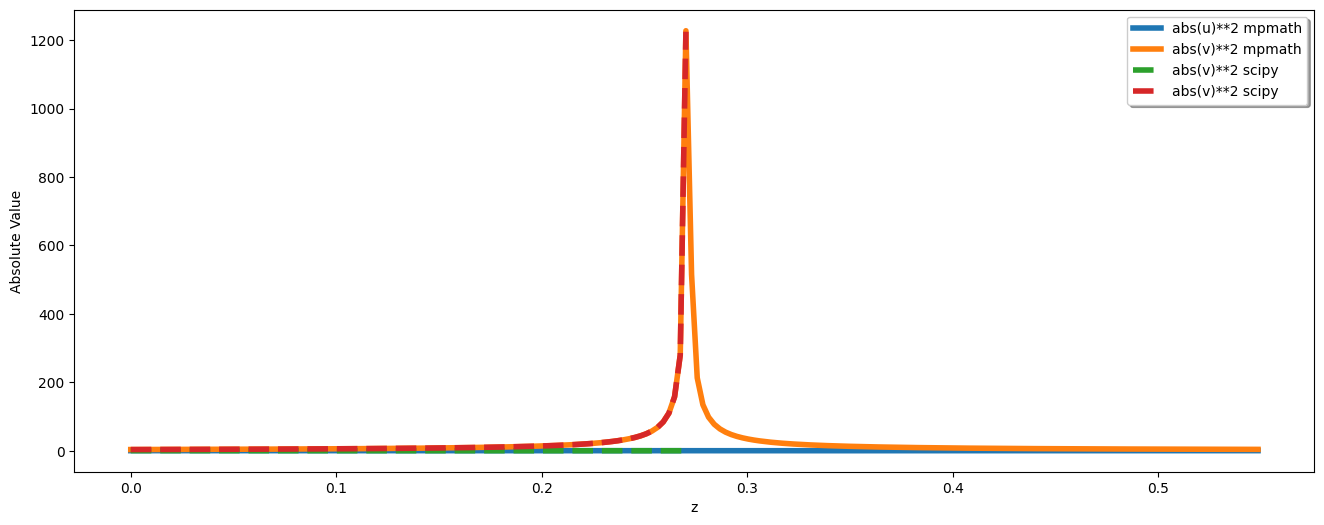

In [167]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, absolute(u_v_sol_mpmath.T), linestyle="solid", linewidth=4) 
__y_vals__ = absolute(A_sol_scipy.T)
plt.plot(z_eval[0: len(__y_vals__)], __y_vals__, linestyle="dashed", linewidth=4) 
plt.legend(['abs(u)**2 mpmath', 'abs(v)**2 mpmath', 'abs(v)**2 scipy', 'abs(v)**2 scipy'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')
plt.show()

### System 2 Checks

In [168]:
Uz_Uz0
Vz_Vz0

Eq(U(z), U(0)*sigma(-z0, g2, g3)*sigma(z - z0 - xi[0], g2, g3)*exp(z*(alpha + 6*zw(xi[0], g2, g3))/6)/(sigma(z - z0, g2, g3)*sigma(-z0 - xi[0], g2, g3)))

Eq(V(z), V(0)*sigma(-z0, g2, g3)*sigma(z - z0 + xi[0], g2, g3)*exp(-z*(alpha/6 + zw(xi[0], g2, g3)))/(sigma(z - z0, g2, g3)*sigma(-z0 + xi[0], g2, g3)))

In [169]:
# The analytic solution
def sigma_sol_2(A0, z0, xi, rho, omegas):
    return lambda z: (
        A0 * (we.wsigma(-z0, omegas) * we.wsigma(-xi + z - z0, omegas) / (we.wsigma(-xi - z0, omegas) * we.wsigma(z - z0, omegas) )) * mpexp(z * rho)
    )

In [170]:
# initial conditions (initial values)
U_V_0 = [0.2, 3.4] 

# Calculate values for intermediate constants in terms of initial conditions
U_V_init_subs = [(U(z), U_V_0[0]), (V(z), U_V_0[1])]
U_V_0_init_subs = [(x[0].subs(z,0), x[1]) for x in U_V_init_subs]
alpha_val_ = 0.4
p_val_ = float(potential_scaled_UV.rhs.subs(U_V_init_subs).subs(alpha, alpha_val_).expand())
p_alpha_val_subs = [(p, p_val_), (alpha, alpha_val_)]
# Calculate values for elliptic invariants in terms of initial conditions
g2val_ = float(g2_UV.rhs.subs(p_alpha_val_subs))
g3val_ = float(g3_UV.rhs.subs(p_alpha_val_subs))
# Calculate lattice of elliptic functions (half-periods) in terms of initial conditions
omega_ = we.omega_from_g(g2val_, g3val_)
omega1_ = mpc_to_float(omega_[0])
omega2_ = mpc_to_float(omega_[1])
omega3_ = mpc_to_float(omega_[2])
if im(omega2_/omega1_) <= 0:
    omega2_ = -omega2_
omegas = (omega1_, omega2_)  
# Calculate complex constants in the z plane in terms of initial conditions via inverse Weierstrass P (elliptic integral)
xi0val_ = mpc_to_float(we.invwp(pw_alpha.rhs.subs(p_alpha_val_subs), omegas, w_prime=pwp_xi0.rhs.subs(p_alpha_val_subs)))
wz0 = pw_z0_u0_v0.rhs.subs(u_v_0_init_subs).subs(p_alpha_val_subs).expand()
wz0p = pwp_z0_u0_v0.rhs.subs(u_v_0_init_subs).subs(p_alpha_val_subs).expand()
z0val_ = mpc_to_float(we.invwp(wz0, omegas, wz0p))
zw_xi0val_ = mpc_to_float(we.wzeta(xi0val_, omegas))
rho_val_ = zw_xi0val_ + alpha_val_/6

# # Setup z array to evaluate over based on 2 complete periods (4 * omega1)
# z_end = abs(4 * omega1_)
z_end = real(omega3_)
n_points_z = 200
z_eval = linspace(0, z_end, n_points_z) # evaluate integral from z = 0-10 for 50 points

# # Complex valued analytic vector solution (numeric evaluation)
U_V__sol_mpmath = arraynp([
    mpc_to_float_np(vectorize(sigma_sol_2(U_V_0[0], z0val_, xi0val_, rho_val_, omegas))(z_eval)),
    mpc_to_float_np(vectorize(sigma_sol_2(U_V_0[1], z0val_, -xi0val_, -rho_val_, omegas))(z_eval))
])

In [171]:
U_p = dU.rhs.subs(p_alpha_val_subs)
V_p = dV.rhs.subs(p_alpha_val_subs)
U_V_dot = [U_p, V_p] # complex valued funtions
_U_symb = Symbol('_U_symb')
_V_symb = Symbol('_V_symb')
U_V_dot_symb = [eq.subs([(U(z), _U_symb), (V(z), _V_symb)]) for eq in U_V_dot]
f_ = lambdify((z, (_U_symb,_V_symb)), U_V_dot_symb)
U_V_init_numeric_only = [x[1] for x in U_V_init_subs]
# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f_,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f (if any)
solution_UV = scipy.integrate.solve_ivp(f_, (0, z_end), U_V_init_numeric_only, t_eval=z_eval)
h_ri_sol_UV = solution_UV.y

# complex valued numeric vector solution
A_sol_scipy_UV = h_ri_sol_UV

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

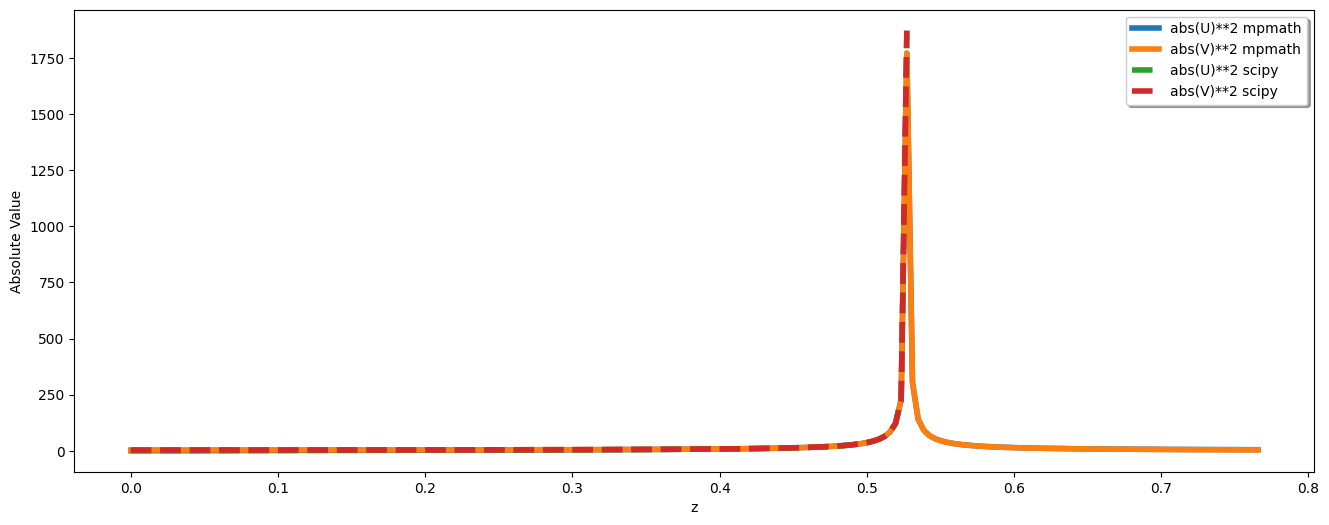

In [172]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, absolute(U_V__sol_mpmath.T), linestyle="solid", linewidth=4) 
__y_vals__ = absolute(A_sol_scipy_UV.T)
plt.plot(z_eval[0: len(__y_vals__)], __y_vals__, linestyle="dashed", linewidth=4) 
plt.legend(['abs(U)**2 mpmath', 'abs(V)**2 mpmath', 'abs(U)**2 scipy', 'abs(V)**2 scipy'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')
plt.show()

In [173]:
omega1_
omega2_
omega3_

(0.3828894472762656+0.22786612212350985j)

(-0.3828894472762656+0.2278661221235099j)

(0.7657788945525312-5.551115123125783e-17j)

In [174]:
xi0val_

(-0.5105192630350208+4.366685699872561e-17j)

In [175]:
0.7657788945525312/0.5105192630350208

1.5

In [176]:
Eq(xi, -2*omega3/3)

Eq(xi, -2*omega3/3)

In [177]:
zw_xi0val_

(-2.3970631797506177-4.440892098500626e-16j)

In [178]:
zw_xi0val_/(alpha_val_/6)

(-35.955947696259265-6.661338147750939e-15j)

In [179]:
rho_val_

(-2.330396513083951-4.440892098500626e-16j)

In [180]:
-2/3*mpc_to_float(we.wzeta(omega3_, omegas))

(-2.3303965130839535-5.921189464667501e-16j)

### When is the Kronecker theta function doubly periodc?

In [181]:
sigma_period_eq_sym_nm

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**(m*n + m + n)*sigma(z, g2, g3)*exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*z + 2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*z))

In [182]:
_beta_dp = Eq(sigma(z-xi[0],g2,g3)/sigma(z,g2,g3)*exp(beta*z), (sigma(z-xi[0],g2,g3)/sigma(z,g2,g3)*exp(beta*z)).subs(z,z+2*m*omega3+2*n*omega1))
_beta_dp

Eq(sigma(z - xi[0], g2, g3)*exp(z*beta)/sigma(z, g2, g3), sigma(2*m*omega3 + 2*n*omega1 + z - xi[0], g2, g3)*exp((2*m*omega3 + 2*n*omega1 + z)*beta)/sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3))

In [183]:
_beta_dp_2 = _beta_dp.subs([sigma_period_eq_sym_nm.args,sigma_period_eq_sym_nm.subs(z,z-xi[0]).args])
_beta_dp_2

Eq(sigma(z - xi[0], g2, g3)*exp(z*beta)/sigma(z, g2, g3), (-1)**(-m*n - m - n)*(-1)**(m*n + m + n)*sigma(z - xi[0], g2, g3)*exp((2*m*omega3 + 2*n*omega1 + z)*beta)*exp(-2*eta1*m*n*omega3 - 2*eta1*n**2*omega1 - 2*eta1*n*z - 2*eta3*m**2*omega3 - 2*eta3*m*n*omega1 - 2*eta3*m*z)*exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*(z - xi[0]) + 2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*(z - xi[0]))/sigma(z, g2, g3))

In [184]:
_beta_dp_3 = Eq(_beta_dp_2.lhs/_beta_dp_2.rhs, 1).simplify()
_beta_dp_3

Eq(exp(2*eta1*n*xi[0] + 2*eta3*m*xi[0] - 2*m*omega3*beta - 2*n*omega1*beta), 1)

In [185]:
_xi0_beta_1 = Eq(_beta_dp_3.lhs.args[0].subs(n,0).factor(),2*I*pi*k)
_xi0_beta_2 =Eq(_beta_dp_3.lhs.args[0].subs(m,0).factor(),2*I*pi*l)
_xi0_beta_1
_xi0_beta_2

Eq(-2*m*(-eta3*xi[0] + omega3*beta), 2*I*pi*k)

Eq(-2*n*(-eta1*xi[0] + omega1*beta), 2*I*pi*l)

In [186]:
_xi0_beta_diff = Eq(
    (_xi0_beta_2.lhs*omega3*m - _xi0_beta_1.lhs*omega1*n).expand().collect([xi[0], beta],factor),
    ( _xi0_beta_2.rhs*omega3*m - _xi0_beta_1.rhs*omega1*n).expand().collect([xi[0], beta],factor)
)
_xi0_beta_diff

Eq(2*m*n*(eta1*omega3 - eta3*omega1)*xi[0], -2*I*pi*(k*n*omega1 - l*m*omega3))

In [187]:
eta_omega_ww

Eq(eta1*omega3 - eta3*omega1, I*pi/2)

In [188]:
_xi0_beta_diff.subs(*eta_omega_ww.args)

Eq(I*pi*m*n*xi[0], -2*I*pi*(k*n*omega1 - l*m*omega3))

## Experiment

In [198]:
du_alpha = dv1_lk.subs([(beta,alpha),(delta, kappa)])
dv_alpha = dv2_lk.subs([(beta,alpha),(delta, kappa)])
du_alpha
dv_alpha

Eq(Derivative(u(z), z), alpha*u(z) - u(z)*v(z)*kappa)

Eq(Derivative(v(z), z), -alpha*v(z) - u(z)*v(z)*kappa)

In [215]:
duv_alpha = Eq(du_alpha.lhs*v(z) + dv_alpha.lhs*u(z), (du_alpha.rhs*v(z) + dv_alpha.rhs*u(z)).expand())
duv_alpha_min = Eq(du_alpha.lhs*v(z) - dv_alpha.lhs*u(z), (du_alpha.rhs*v(z) - dv_alpha.rhs*u(z)).expand())
duv_alpha
duv_alpha_min

Eq(u(z)*Derivative(v(z), z) + v(z)*Derivative(u(z), z), -u(z)**2*v(z)*kappa - u(z)*v(z)**2*kappa)

Eq(-u(z)*Derivative(v(z), z) + v(z)*Derivative(u(z), z), 2*alpha*u(z)*v(z) + u(z)**2*v(z)*kappa - u(z)*v(z)**2*kappa)

In [208]:
uv_alpha_K = Eq(kappa*(v(z)*u(z)**2 - u(z)*v(z)**2), (u(z)*v(z))*beta + K)
uv_alpha_K

Eq((u(z)**2*v(z) - u(z)*v(z)**2)*kappa, K + u(z)*v(z)*beta)

In [209]:
Eq(duv_alpha.lhs**2, (duv_alpha.rhs**2).expand())

Eq((u(z)*Derivative(v(z), z) + v(z)*Derivative(u(z), z))**2, u(z)**4*v(z)**2*kappa**2 + 2*u(z)**3*v(z)**3*kappa**2 + u(z)**2*v(z)**4*kappa**2)

In [211]:
Eq(uv_alpha_K.lhs**2 - uv_alpha_K.rhs**2, 0).expand()

Eq(-K**2 - 2*K*u(z)*v(z)*beta + u(z)**4*v(z)**2*kappa**2 - 2*u(z)**3*v(z)**3*kappa**2 + u(z)**2*v(z)**4*kappa**2 - u(z)**2*v(z)**2*beta**2, 0)

In [212]:
K_uv_alpha = Eq(K, solve(uv_alpha_K,K)[0])
K_uv_alpha

Eq(K, (u(z)*kappa - v(z)*kappa - beta)*u(z)*v(z))

In [214]:
Eq(diff(u(z),z), diff(K_uv_alpha.rhs,v(z))).expand()
Eq(diff(v(z),z), -diff(K_uv_alpha.rhs,u(z))).expand()

Eq(Derivative(u(z), z), u(z)**2*kappa - 2*u(z)*v(z)*kappa - u(z)*beta)

Eq(Derivative(v(z), z), -2*u(z)*v(z)*kappa + v(z)**2*kappa + v(z)*beta)